# PROJECT_TEAM_ID:- PTID-CDS-MAY-23-1529

# PROJECT_REFERENCE_CODE:- PM-PR-0015

# DATA SCIENCE CLIENT PROJECT ON BANK GOOD CREDIT

# BUSINESS CASE :-  
 ### Bank GoodCredit wants to predict cred score for current credit card customers. The cred score will denote a customer’s credit worthiness and help the bank in reducing credit default risk.

## TASK :-  CLASSIFICTION TASK

## INTRODUCTION OF PROJECT :-
   * A credit card is a financial instrument, which can be used more than once to borrow money or buy products and services on        credit.
   * Banks, retail stores and other businesses generally issue these.


**Credit limit:-**
   * The maximum amount of charges a card holder may apply to the account.


**Annual Fee:-**
   * A bank charge for use of a credit card levied each year, which ranges depending upon the type of card one possesses.Banks        usually take an initial fixed amount in the first year and then lower amount as yearly renewal fees. Revolving Line Of          Credit


**TARGET COLUMN == Bad_label**
* 0 Represent--Customer has Good credit history
* 1 Represent--Customer has Bad credit history

## PROJECT GOAL :-

**Build a model with the data provided**

1. Data exploration insights – what did we find and what decision we took?
2. Feature matrix - List of features selected with gain
3. Model evaluation - Gini and rank ordering

### PROJECT IS DIVIDED INTO CERTAIN STEPS :-

1. Fetching data from data-base.
2. Domain analysis.
3. EDA: [Univariate, Bivariate & Multivariate analysis condition]
4. Data preprocessing/Feature Engineering.
5. Feature selection.
6. Model creation.
7. Model Evaluation.
8. Model Saving

# IMPORTING IMPORTANT LIBRARIES :-

In [1]:
!pip install mysql.connector


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 24.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mysql.connector: filename=mysql_connector-2.2.9-cp310-cp310-linux_x86_64.whl size=247952 sha256=7e2960794191fc7a853102464afe07ced4804af15599fea70cb0affaf19865e0
  Stored in directory: /root/.cache/pip/wheels/76/48/9b/da67ff1a18fe8e9d428f9b1a177716d4a7d363d2bbe83bf6cf
Successfully built mysql.connector


In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import os
import mysql.connector

# To avoid warnings
import warnings
warnings.filterwarnings("ignore")

# MAKING CONNECTION TO SERVER :-

In [3]:
# making connections to database server
connection = mysql.connector.connect(host ='18.136.157.135',
                                    port = 3306,
                                    user ='dm_team1',
                                    password ='DM!$Team&279@20!',
                                    database ='project_banking')

#### The above code establishes a connection to a MySQL database server located at IP address '18.136.157.135' on port 3306. It uses the username 'dm_team1' and the corresponding password to access the 'project_banking' database.

In [4]:
connection

#### "connection" refers to the variable or object named "connection" that we have created in our code. This variable is used to store and manage the connection to the MySQL database server. It holds all the information needed to communicate with the database, such as the server's address, port, username, and password. We can use this "connection" variable to perform various database operations, such as executing queries or retrieving data from the database.

In [5]:
# Check the number of databases available on the server
cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)


('information_schema',)
('project_banking',)


#### cursor=connection.cursor(): This line creates a "cursor" object named "cursor" associated with our database connection. A cursor is like a pointer or control structure that allows us to execute SQL queries and fetch results from the database.

#### cursor.execute('show databases'): This line executes an SQL query. Specifically, it runs the "SHOW DATABASES" query, which retrieves a list of all the databases available on the MySQL server we are connected to.

#### for i in cursor:: This line starts a loop that iterates over the results of the query. In this case, it iterates over the list of databases retrieved by the "SHOW DATABASES" query.

#### print(i): Within the loop, this line prints each database name (retrieved from the query results) to the console. So, it will display the names of all the databases available on the MySQL server.

#### In summary, this code establishes a connection to a MySQL database, retrieves a list of all databases on the server, and then prints the names of those databases to the console, one at a time.

In [6]:
database_tables=pd.read_sql_query('show tables',connection)
print(database_tables)

  Tables_in_project_banking
0              Cust_Account
1         Cust_Demographics
2              Cust_Enquiry


#### In this data 3 tables are there.
#### database_tables=pd.read_sql_query('show tables',connection): This line of code uses the pd.read_sql_query function from the Pandas library to execute an SQL query on the database using the existing database connection. The query being executed is 'show tables', which retrieves a list of all the tables in the currently selected database.

#### print(database_tables): After executing the SQL query, the result (which will be a list of table names) is stored in the variable database_tables. This line then prints the content of database_tables to the console, which will display the list of table names from the database.

#### So, in summary, this code connects to a MySQL database, retrieves a list of all the tables in the database, stores that list in the database_tables variable, and then prints the list of table names to the console using Pandas.

# FETCHING DATA FROM THE DATABASE :-

## 1. Customer Account Data (Table : Cust_Account) :-

#### This table contains customer’s historical accounts data and payments history

In [7]:
query_1='select *from Cust_Account'
data_1=pd.read_sql(query_1,connection)
pd.set_option('display.max_columns',None)
print(data_1.shape)
data_1.head()

(186329, 21)


dt_opened customer_no  upload_dt acct_type owner_indic  opened_dt  \
0  10-Nov-15       12265  20-Oct-15         6           1  09-Jun-13   
1  10-Nov-15       12265  20-Oct-15        10           1  25-May-12   
2  10-Nov-15       12265  20-Oct-15        10           1  22-Mar-12   
3  20-Jul-15       15606  09-Jul-15        10           1  13-Jan-06   
4  20-Jul-15       15606  09-Jul-15         6           1  18-Jan-15   

  last_paymt_dt  closed_dt reporting_dt high_credit_amt cur_balance_amt  \
0     30-Jun-14  05-Jul-14    30-Sep-15           20900               0   
1     06-Sep-15               03-Oct-15           16201           10390   
2     31-Aug-15               30-Sep-15           41028           34420   
3                26-Jul-07    31-Jan-09           93473               0   
4     05-May-15               31-May-15           20250           13500   

  amt_past_due                                    paymenthistory1  \
0               """STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...   
1               """0000000000000000000000000000000000000000000...   
2               """0000000000000000000000000000000000000000000...   
3               """1200900600600600300000000000000000000000000...   
4                                           """000000000000000"""   

                                     paymenthistory2 paymt_str_dt  \
0                                                       01-Sep-15   
1  """000000000000000000000000000XXX0000000000000...    01-Oct-15   
2  """0000000000000000000000000000000000000000000...    01-Sep-15   
3                                                       01-Jul-07   
4                                                       01-May-15   

  paymt_end_dt creditlimit cashlimit rateofinterest paymentfrequency  \
0    01-Jul-14                                                         
1    01-Nov-12       14000      1400                               3   
2    01-Oct-12                                                         
3    01-Feb-06                                                         
4    01-Jan-15                                                         

  actualpaymentamount  
0                      
1                5603  
2                      
3                      
4

#### query_1='select *from Cust_Account': This line defines an SQL query stored in the variable query_1. The query is set to retrieve all columns (*) from the table named Cust_Account.

#### data_1=pd.read_sql(query_1,connection): This line uses the Pandas library's pd.read_sql function to execute the SQL query (query_1) on the connected MySQL database (connection). The result of the query is stored in the variable data_1 as a Pandas DataFrame.

#### pd.set_option('display.max_columns',None): This line sets a Pandas option to display all columns of the DataFrame when it's printed, by setting the maximum number of columns to None.

#### print(data_1.shape): This line prints the shape of the DataFrame data_1, which represents the number of rows and columns in the DataFrame.

#### data_1.head(): This line displays the first few rows of the DataFrame data_1 using the head() method, giving you a preview of the data.

#### In summary, this code performs the following actions:--
#### Executes an SQL query to retrieve all columns from the Cust_Account table; Stores the query result in a Pandas DataFrame named data_1; Adjusts Pandas options to display all columns when printing; Prints the shape (rows and columns) of the DataFrame; Displays the first few rows of the DataFrame.



In [8]:
customer_acc_columns = ['customer_no','high_credit_amt','cur_balance_amt','amt_past_due','cashlimit','creditlimit']
data_cust_acc = data_1.loc[:,customer_acc_columns]
data_cust_acc.head()

customer_no high_credit_amt cur_balance_amt amt_past_due cashlimit  \
0       12265           20900               0                          
1       12265           16201           10390                   1400   
2       12265           41028           34420                          
3       15606           93473               0                          
4       15606           20250           13500                          

  creditlimit  
0              
1       14000  
2              
3              
4

#### The above code extracts specific columns ('customer_no', 'high_credit_amt', 'cur_balance_amt', 'amt_past_due', 'cashlimit', 'creditlimit') from the original DataFrame (data_1) and stores them in a new DataFrame (data_cust_acc). Then, it displays the first few rows of this new DataFrame.

In [9]:
cust_acc_group = data_cust_acc.groupby(['customer_no'])
cust_acc_group.head()

customer_no high_credit_amt cur_balance_amt amt_past_due cashlimit  \
0            12265           20900               0                          
1            12265           16201           10390                   1400   
2            12265           41028           34420                          
3            15606           93473               0                          
4            15606           20250           13500                          
...            ...             ...             ...          ...       ...   
186317        1611           97741               0                          
186318        1611          300000          287017                          
186319        1611           34001               0                          
186320        1611           42320               0                          
186321        1611          130000               0                          

       creditlimit  
0                   
1            14000  
2                   
3                   
4                   
...            ...  
186317              
186318              
186319              
186320       42490  
186321              

[99181 rows x 6 columns]

#### cust_acc_group = data_cust_acc.groupby(['customer_no']): This line of code groups the data in the data_cust_acc DataFrame by the 'customer_no' column. It creates a new object called cust_acc_group, which is a Pandas GroupBy object. This means that the data is organized into groups based on unique values in the 'customer_no' column.

#### cust_acc_group.head(): This line displays the first few rows of each group within the cust_acc_group object. It shows a preview of the grouped data, where each group represents a unique customer identified by their 'customer_no'. The head() function is used to display only a few rows from each group.
#### This can be useful for understanding the structure of the grouped data or for performing further analysis on each customer's account data.

In [10]:
acc_data = pd.DataFrame(cust_acc_group.sum()).reset_index()
acc_data.head()

customer_no                                    high_credit_amt  \
0           1  2528846125459139765171256290596200000020000009...   
1          10  1111113565675230005500000531458600000111851500...   
2         100      747754333541229800010000454945000034240350000   
3        1000                                 548289548289147688   
4       10000                   52590480000562501997410200520000   

                                  cur_balance_amt amt_past_due   cashlimit  \
0  2528846588820003759832549017546780000093630000  25288469363      168000   
1                           068994000178725000000                   243000   
2                       3970033460980316015530000                980017700   
3                                     31349029113               6750081000   
4                 1752758222031250-26123003454770                    10000   

       creditlimit  
0     250000420000  
1           405000  
2  300009800059000  
3     225000270000  
4            60000

#### cust_acc_group.sum(): This part calculates the sum of each numerical column within each group created by cust_acc_group. In other words, it sums up the values of each numerical column (e.g., 'high_credit_amt', 'cur_balance_amt', etc.) for each customer.

#### .reset_index(): After performing the sum operation, this part resets the index of the resulting DataFrame. By resetting the index, the 'customer_no' column, which was previously the index, is converted back into a regular column, and the DataFrame gets a new default integer index.

#### acc_data.head(): This line displays the first few rows of the acc_data DataFrame. The acc_data DataFrame now contains the sum of numerical values for each customer, and we're previewing the first few rows to see this aggregated data.

#### In summary, this code takes the grouped data, calculates the sum of numerical columns for each customer, stores the result in a new DataFrame (acc_data), and then displays the first few rows of this aggregated data. This can be useful for analyzing the total financial activity for each customer.

In [11]:
acc_data.to_csv('Cust_Account_data.csv',index=False)
print(acc_data.shape)

(23896, 6)


#### acc_data.to_csv(...): This line is saving the acc_data DataFrame to a CSV file named 'Cust_Account_data.csv'. The to_csv function is a Pandas function used to export DataFrame data to a CSV file.

#### index=False: This argument tells Pandas not to include the DataFrame's index column in the CSV file. When set to False, it means the CSV file will not have an additional column for row numbers
#### The shape information helps you understand the size of the data you've exported to the CSV file

## 2. Demographics Data (Table : Cust_Demographics) :-

#### Current customer applications with demographic data.

#### Note that demographics features are renamed as features and obscured in accordance with privacy policies.

In [12]:
query_2 = 'select *from Cust_Demographics'
data_2=pd.read_sql(query_2,connection)
pd.set_option('display.max_columns',None)
data_2.head()

dt_opened customer_no entry_time feature_1  feature_2 feature_3 feature_4  \
0  18-Apr-15           1  13-Apr-15  Insignia  13-Apr-15       650         2   
1  21-Apr-15           2  21-Apr-15  Insignia  21-Apr-15       760         1   
2  22-Apr-15           3  21-Apr-15  Insignia  21-Apr-15       774         1   
3  25-Apr-15           4  15-Apr-15  Insignia  20-Apr-15       770         1   
4  06-May-15           5  30-Apr-15  Insignia                              3   

    feature_5 feature_6 feature_7 feature_8 feature_9 feature_10 feature_11  \
0  Card Setup        14    500000                                         Y   
1  Card Setup        14   1200000                                         Y   
2  Card Setup        14    700000                                         Y   
3  Card Setup        14    500000                                         Y   
4  Card Setup        14    500000                                         Y   

  feature_12 feature_13 feature_14 feature_15 feature_16 feature_17  \
0        IS1                     0        159       4284       4284   
1        IS1                     0         91       B001       4077   
2        IS1                     0         91       B001       4077   
3        IS1                     0        157       5107       5107   
4        IS1                     0        100       D016       4564   

  feature_18 feature_19  feature_20 feature_21  feature_22 feature_23  \
0                     1  ADFPNXXXXX  03-Sep-65  98332XXXXX          N   
1                     1  AJWPRXXXXX  14-Jul-62  99455XXXXX          N   
2                     2  AFAPNXXXXX  10-Apr-66  98456XXXXX          N   
3                     1  AAAPDXXXXX  16-Apr-64  98220XXXXX          N   
4                     1  ABEPSXXXXX  03-Jan-54  98111XXXXX          N   

          feature_24 feature_25 feature_26 feature_27  \
0    @REDIFFMAIL.COM          1          2              
1         @GMAIL.COM          1          2              
2  @SHOBANARAYAN.COM          1          0              
3          @VSNL.COM          1          3              
4    @REDIFFMAIL.COM          1          3              

                     feature_28 feature_29 feature_30 feature_31 feature_32  \
0  Mumbai / Navi Mumbai / Thane     400610       1965          0       Self   
1                     Bengaluru     560042       1969          0       Self   
2                     Bengaluru     560042       1966          0       Self   
3                          Pune     411001       1988          0       Self   
4                       Gurgaon     122009       1995          0       Self   

  feature_33 feature_34 feature_35 feature_36 feature_37 feature_38  \
0          Y          2      90000                                    
1          Y          2          1                                    
2          Y          2          1                                    
3          Y          2     100000                                    
4          Y          2     300000                                    

  feature_39 feature_40 feature_41 feature_42 feature_43 feature_44  \
0          0          0          0          0     Mumbai     400059   
1          0          0          0          0  Bangalore     560042   
2          0          0          0          0  Bangalore     560042   
3          0          0          0          0       Pune     411026   
4          0          0          0          0    Gurgaon     122009   

        feature_45 feature_46  feature_47              feature_48 feature_49  \
0  @CODOGNOTTO.NET   PAN Card  ADFPNXXXXX  The Ratnakar Bank Ltd.              
1                    PAN Card  AJWPRXXXXX  The Ratnakar Bank Ltd.              
2                    PAN Card  AFAPNXXXXX                                      
3       @ALBAJ.COM   PAN Card  AAAPDXXXXX  The Ratnakar Bank Ltd.              
4                    PAN Card  ABEPSXXXXX  The Ratnakar Bank Ltd.              

  feature_50           featu

#### In summary, this code performs the following actions:-
#### Executes an SQL query to retrieve all columns from the 'Cust_Demographics' table; Stores the query result in a Pandas DataFrame named data_2; Adjusts Pandas options to display all columns when printing; Displays the first few rows of the DataFrame, providing a preview of the data in the 'Cust_Demographics' table.




In [13]:
demo_data = data_2
print(demo_data.shape)
demo_data.head()

(23896, 83)


dt_opened customer_no entry_time feature_1  feature_2 feature_3 feature_4  \
0  18-Apr-15           1  13-Apr-15  Insignia  13-Apr-15       650         2   
1  21-Apr-15           2  21-Apr-15  Insignia  21-Apr-15       760         1   
2  22-Apr-15           3  21-Apr-15  Insignia  21-Apr-15       774         1   
3  25-Apr-15           4  15-Apr-15  Insignia  20-Apr-15       770         1   
4  06-May-15           5  30-Apr-15  Insignia                              3   

    feature_5 feature_6 feature_7 feature_8 feature_9 feature_10 feature_11  \
0  Card Setup        14    500000                                         Y   
1  Card Setup        14   1200000                                         Y   
2  Card Setup        14    700000                                         Y   
3  Card Setup        14    500000                                         Y   
4  Card Setup        14    500000                                         Y   

  feature_12 feature_13 feature_14 feature_15 feature_16 feature_17  \
0        IS1                     0        159       4284       4284   
1        IS1                     0         91       B001       4077   
2        IS1                     0         91       B001       4077   
3        IS1                     0        157       5107       5107   
4        IS1                     0        100       D016       4564   

  feature_18 feature_19  feature_20 feature_21  feature_22 feature_23  \
0                     1  ADFPNXXXXX  03-Sep-65  98332XXXXX          N   
1                     1  AJWPRXXXXX  14-Jul-62  99455XXXXX          N   
2                     2  AFAPNXXXXX  10-Apr-66  98456XXXXX          N   
3                     1  AAAPDXXXXX  16-Apr-64  98220XXXXX          N   
4                     1  ABEPSXXXXX  03-Jan-54  98111XXXXX          N   

          feature_24 feature_25 feature_26 feature_27  \
0    @REDIFFMAIL.COM          1          2              
1         @GMAIL.COM          1          2              
2  @SHOBANARAYAN.COM          1          0              
3          @VSNL.COM          1          3              
4    @REDIFFMAIL.COM          1          3              

                     feature_28 feature_29 feature_30 feature_31 feature_32  \
0  Mumbai / Navi Mumbai / Thane     400610       1965          0       Self   
1                     Bengaluru     560042       1969          0       Self   
2                     Bengaluru     560042       1966          0       Self   
3                          Pune     411001       1988          0       Self   
4                       Gurgaon     122009       1995          0       Self   

  feature_33 feature_34 feature_35 feature_36 feature_37 feature_38  \
0          Y          2      90000                                    
1          Y          2          1                                    
2          Y          2          1                                    
3          Y          2     100000                                    
4          Y          2     300000                                    

  feature_39 feature_40 feature_41 feature_42 feature_43 feature_44  \
0          0          0          0          0     Mumbai     400059   
1          0          0          0          0  Bangalore     560042   
2          0          0          0          0  Bangalore     560042   
3          0          0          0          0       Pune     411026   
4          0          0          0          0    Gurgaon     122009   

        feature_45 feature_46  feature_47              feature_48 feature_49  \
0  @CODOGNOTTO.NET   PAN Card  ADFPNXXXXX  The Ratnakar Bank Ltd.              
1                    PAN Card  AJWPRXXXXX  The Ratnakar Bank Ltd.              
2                    PAN Card  AFAPNXXXXX                                      
3       @ALBAJ.COM   PAN Card  AAAPDXXXXX  The Ratnakar Bank Ltd.              
4                    PAN Card  ABEPSXXXXX  The Ratnakar Bank Ltd.              

  feature_50           featu

####  The above code creates a copy of the 'Cust_Demographics' data in the demo_data DataFrame and then prints the shape (number of rows and columns) of this DataFrame, followed by a preview of the first few rows of data. This is useful for examining the structure and content of the 'Cust_Demographics' data.

In [14]:
demo_data.to_csv('Cust_Demographics_data.csv',index=False)

#### The above code saves the data from the 'Cust_Demographics' table (stored in the demo_data DataFrame) to a CSV file called 'Cust_Demographics_data.csv'. The index column is excluded from the CSV file. This can be useful for storing the data in a format that can be easily shared or analyzed using other tools.

## 3. Customer Enquiry Data (Table : Cust_Enquiry) :-

#### This table contains customer’s historical enquiry data such as enquiry amount and enquiry purpose.

In [15]:
query_3 = 'select *from Cust_Enquiry'
data_3 = pd.read_sql(query_3,connection)
pd.set_option('display.max_columns',None)
print(data_3.shape)
data_3.head()

(413188, 6)


dt_opened customer_no  upload_dt enquiry_dt enq_purpose  enq_amt
0  18-Apr-15           1  21-Apr-15  19-Dec-14           2  3500000
1  18-Apr-15           1  21-Apr-15  05-Mar-14           5   500000
2  18-Apr-15           1  21-Apr-15  05-Mar-14           0    50000
3  18-Apr-15           1  21-Apr-15  22-Feb-14          10    50000
4  18-Apr-15           1  21-Apr-15  11-Jun-13          10     1000

#### The above code performs the following actions:-

#### Executes an SQL query to retrieve all columns from the 'Cust_Enquiry' table; Stores the query result in a Pandas DataFrame named data_3 ; Adjusts Pandas options to display all columns when printing ; Prints the shape (number of rows and columns) of the DataFrame ; Displays the first few rows of the DataFrame, providing a preview of the data in the 'Cust_Enquiry' table.





In [16]:
data_3.to_csv('Cust_Enquiry',index=False)
data_3=pd.read_csv('Cust_Enquiry')
data_3.head()

dt_opened  customer_no  upload_dt enquiry_dt  enq_purpose    enq_amt
0  18-Apr-15            1  21-Apr-15  19-Dec-14          2.0  3500000.0
1  18-Apr-15            1  21-Apr-15  05-Mar-14          5.0   500000.0
2  18-Apr-15            1  21-Apr-15  05-Mar-14          0.0    50000.0
3  18-Apr-15            1  21-Apr-15  22-Feb-14         10.0    50000.0
4  18-Apr-15            1  21-Apr-15  11-Jun-13         10.0     1000.0

#### The above code initially saves the 'Cust_Enquiry' data to a CSV file, then reads it back into a DataFrame, and finally, it displays the first few rows of the data. This process can be useful for storing data persistently and then working with it in subsequent sessions or analyses.

In [17]:
data_cust_enquiry=data_3.loc[:,['customer_no','enq_amt']]
data_cust_enquiry.head()

customer_no    enq_amt
0            1  3500000.0
1            1   500000.0
2            1    50000.0
3            1    50000.0
4            1     1000.0

#### The above code extracts specific columns ('customer_no' and 'enq_amt') from the original DataFrame (data_3) and stores them in a new DataFrame (data_cust_enquiry). Then, it displays the first few rows of this new DataFrame, showing only the selected columns. This can be useful for focusing on and analyzing specific aspects of the data.

In [18]:
Cust_enquiry_group = data_cust_enquiry.groupby(['customer_no'])
Cust_enquiry_group.head()

customer_no    enq_amt
0                 1  3500000.0
1                 1   500000.0
2                 1    50000.0
3                 1    50000.0
4                 1     1000.0
...             ...        ...
413172        23896    10000.0
413173        23896     1000.0
413174        23896    15000.0
413175        23896     1000.0
413176        23896     1000.0

[113409 rows x 2 columns]

#### The above code groups the data in data_cust_enquiry by 'customer_no', creating groups based on each unique customer, and then shows the first few rows of each group as a preview. This can be useful for understanding the structure of the grouped data or for performing further analysis on each customer's enquiry data.

In [19]:
enquiry_data_count = pd.DataFrame(Cust_enquiry_group.count()).reset_index()
enquiry_data_count.columns = ['customer_no','total_enq_count']
enquiry_data_count.head()

customer_no  total_enq_count
0            1               18
1            2               68
2            3                1
3            4               34
4            5                2

#### The above code creates a new DataFrame (enquiry_data_count) that summarizes the total number of enquiries for each customer by counting the rows in each group, renames the columns for clarity, and then displays the first few rows of this summary data. This can be useful for understanding the number of enquiries made by each customer.

In [20]:
enquiry_data_amt=pd.DataFrame(Cust_enquiry_group.sum()).reset_index()
enquiry_data_amt.columns = ['customer_no','total_enq_amt']
enquiry_data_amt.head(7)

customer_no  total_enq_amt
0            1   4.981150e+06
1            2   6.676682e+09
2            3   3.400000e+06
3            4   5.081000e+07
4            5   2.000000e+03
5            6   1.356240e+08
6            7   5.000000e+04

####  The above code creates a new DataFrame (enquiry_data_amt) that summarizes the total enquiry amount for each customer by summing the 'enq_amt' column within each group, renames the columns for clarity, and then displays the first seven rows of this summary data. This can be useful for understanding the total enquiry amounts made by each customer.

In [21]:
enquiry_data =pd.merge(enquiry_data_count,enquiry_data_amt,on='customer_no',how='inner')
enquiry_data.head()

customer_no  total_enq_count  total_enq_amt
0            1               18   4.981150e+06
1            2               68   6.676682e+09
2            3                1   3.400000e+06
3            4               34   5.081000e+07
4            5                2   2.000000e+03

#### pd.merge(...): This line uses the Pandas merge function to combine the data from two DataFrames, enquiry_data_count and enquiry_data_amt.

#### on='customer_no': This specifies that the merge should be based on the 'customer_no' column, which is common to both DataFrames. It indicates that the 'customer_no' column will be used as the matching key.

#### how='inner': This specifies the type of merge to perform. In this case, it's an 'inner' merge, which means that only the rows with matching 'customer_no' values in both DataFrames will be included in the result. Rows with non-matching 'customer_no' values will be excluded.

#### The above code merges two DataFrames (enquiry_data_count and enquiry_data_amt) based on the 'customer_no' column, resulting in a new DataFrame (enquiry_data) that combines information about the total enquiry count and total enquiry amount for each customer. The merge is performed as an inner join, ensuring that only customers with matching 'customer_no' values in both DataFrames are included in the result.

In [22]:
enquiry_data.to_csv('Cust_enquiry_data.csv',index=False)

#### The above code saves the data from the enquiry_data DataFrame, which contains information about customer enquiries, to a CSV file named 'Cust_enquiry_data.csv'. The index column is excluded from the CSV file. This can be useful for storing the data in a format that can be easily shared or analyzed using other tools.

In [23]:
print(acc_data.shape)
print(demo_data.shape)
print(enquiry_data.shape)

(23896, 6)
(23896, 83)
(23896, 3)


#### These lines are giving us information about the dimensions (number of rows and columns) of each of the three DataFrames: acc_data, demo_data, and enquiry_data. This is useful for understanding the size and structure of your data.

In [24]:
data_merge=pd.merge(demo_data,acc_data,on='customer_no', how='inner')
print(data_merge.shape)
data_merge.head()

(23896, 88)


dt_opened customer_no entry_time feature_1  feature_2 feature_3 feature_4  \
0  18-Apr-15           1  13-Apr-15  Insignia  13-Apr-15       650         2   
1  21-Apr-15           2  21-Apr-15  Insignia  21-Apr-15       760         1   
2  22-Apr-15           3  21-Apr-15  Insignia  21-Apr-15       774         1   
3  25-Apr-15           4  15-Apr-15  Insignia  20-Apr-15       770         1   
4  06-May-15           5  30-Apr-15  Insignia                              3   

    feature_5 feature_6 feature_7 feature_8 feature_9 feature_10 feature_11  \
0  Card Setup        14    500000                                         Y   
1  Card Setup        14   1200000                                         Y   
2  Card Setup        14    700000                                         Y   
3  Card Setup        14    500000                                         Y   
4  Card Setup        14    500000                                         Y   

  feature_12 feature_13 feature_14 feature_15 feature_16 feature_17  \
0        IS1                     0        159       4284       4284   
1        IS1                     0         91       B001       4077   
2        IS1                     0         91       B001       4077   
3        IS1                     0        157       5107       5107   
4        IS1                     0        100       D016       4564   

  feature_18 feature_19  feature_20 feature_21  feature_22 feature_23  \
0                     1  ADFPNXXXXX  03-Sep-65  98332XXXXX          N   
1                     1  AJWPRXXXXX  14-Jul-62  99455XXXXX          N   
2                     2  AFAPNXXXXX  10-Apr-66  98456XXXXX          N   
3                     1  AAAPDXXXXX  16-Apr-64  98220XXXXX          N   
4                     1  ABEPSXXXXX  03-Jan-54  98111XXXXX          N   

          feature_24 feature_25 feature_26 feature_27  \
0    @REDIFFMAIL.COM          1          2              
1         @GMAIL.COM          1          2              
2  @SHOBANARAYAN.COM          1          0              
3          @VSNL.COM          1          3              
4    @REDIFFMAIL.COM          1          3              

                     feature_28 feature_29 feature_30 feature_31 feature_32  \
0  Mumbai / Navi Mumbai / Thane     400610       1965          0       Self   
1                     Bengaluru     560042       1969          0       Self   
2                     Bengaluru     560042       1966          0       Self   
3                          Pune     411001       1988          0       Self   
4                       Gurgaon     122009       1995          0       Self   

  feature_33 feature_34 feature_35 feature_36 feature_37 feature_38  \
0          Y          2      90000                                    
1          Y          2          1                                    
2          Y          2          1                                    
3          Y          2     100000                                    
4          Y          2     300000                                    

  feature_39 feature_40 feature_41 feature_42 feature_43 feature_44  \
0          0          0          0          0     Mumbai     400059   
1          0          0          0          0  Bangalore     560042   
2          0          0          0          0  Bangalore     560042   
3          0          0          0          0       Pune     411026   
4          0          0          0          0    Gurgaon     122009   

        feature_45 feature_46  feature_47              feature_48 feature_49  \
0  @CODOGNOTTO.NET   PAN Card  ADFPNXXXXX  The Ratnakar Bank Ltd.              
1                    PAN Card  AJWPRXXXXX  The Ratnakar Bank Ltd.              
2                    PAN Card  AFAPNXXXXX                                      
3       @ALBAJ.COM   PAN Card  AAAPDXXXXX  The Ratnakar Bank Ltd.              
4                    PAN Card  ABEPSXXXXX  The Ratnakar Bank Ltd.              

  feature_50           featu

#### The above code merges two DataFrames (demo_data and acc_data) based on the 'customer_no' column, resulting in a new DataFrame (data_merge) that combines information from both DataFrames. The merge is performed as an inner join, ensuring that only customers with matching 'customer_no' values in both DataFrames are included in the result. It then prints the shape of the merged DataFrame and displays the first few rows of the merged data.

In [25]:
data_final=pd.concat([data_merge,enquiry_data],axis=1)
print(data_final.shape)
data_final.head()

(23896, 91)


dt_opened  customer_no entry_time feature_1  feature_2 feature_3 feature_4  \
0  18-Apr-15            1  13-Apr-15  Insignia  13-Apr-15       650         2   
1  21-Apr-15            2  21-Apr-15  Insignia  21-Apr-15       760         1   
2  22-Apr-15            3  21-Apr-15  Insignia  21-Apr-15       774         1   
3  25-Apr-15            4  15-Apr-15  Insignia  20-Apr-15       770         1   
4  06-May-15            5  30-Apr-15  Insignia                              3   

    feature_5 feature_6 feature_7 feature_8 feature_9 feature_10 feature_11  \
0  Card Setup        14    500000                                         Y   
1  Card Setup        14   1200000                                         Y   
2  Card Setup        14    700000                                         Y   
3  Card Setup        14    500000                                         Y   
4  Card Setup        14    500000                                         Y   

  feature_12 feature_13 feature_14 feature_15 feature_16 feature_17  \
0        IS1                     0        159       4284       4284   
1        IS1                     0         91       B001       4077   
2        IS1                     0         91       B001       4077   
3        IS1                     0        157       5107       5107   
4        IS1                     0        100       D016       4564   

  feature_18 feature_19  feature_20 feature_21  feature_22 feature_23  \
0                     1  ADFPNXXXXX  03-Sep-65  98332XXXXX          N   
1                     1  AJWPRXXXXX  14-Jul-62  99455XXXXX          N   
2                     2  AFAPNXXXXX  10-Apr-66  98456XXXXX          N   
3                     1  AAAPDXXXXX  16-Apr-64  98220XXXXX          N   
4                     1  ABEPSXXXXX  03-Jan-54  98111XXXXX          N   

          feature_24 feature_25 feature_26 feature_27  \
0    @REDIFFMAIL.COM          1          2              
1         @GMAIL.COM          1          2              
2  @SHOBANARAYAN.COM          1          0              
3          @VSNL.COM          1          3              
4    @REDIFFMAIL.COM          1          3              

                     feature_28 feature_29 feature_30 feature_31 feature_32  \
0  Mumbai / Navi Mumbai / Thane     400610       1965          0       Self   
1                     Bengaluru     560042       1969          0       Self   
2                     Bengaluru     560042       1966          0       Self   
3                          Pune     411001       1988          0       Self   
4                       Gurgaon     122009       1995          0       Self   

  feature_33 feature_34 feature_35 feature_36 feature_37 feature_38  \
0          Y          2      90000                                    
1          Y          2          1                                    
2          Y          2          1                                    
3          Y          2     100000                                    
4          Y          2     300000                                    

  feature_39 feature_40 feature_41 feature_42 feature_43 feature_44  \
0          0          0          0          0     Mumbai     400059   
1          0          0          0          0  Bangalore     560042   
2          0          0          0          0  Bangalore     560042   
3          0          0          0          0       Pune     411026   
4          0          0          0          0    Gurgaon     122009   

        feature_45 feature_46  feature_47              feature_48 feature_49  \
0  @CODOGNOTTO.NET   PAN Card  ADFPNXXXXX  The Ratnakar Bank Ltd.              
1                    PAN Card  AJWPRXXXXX  The Ratnakar Bank Ltd.              
2                    PAN Card  AFAPNXXXXX                                      
3       @ALBAJ.COM   PAN Card  AAAPDXXXXX  The Ratnakar Bank Ltd.              
4                    PAN Card  ABEPSXXXXX  The Ratnakar Bank Ltd.              

  feature_50          

#### pd.concat(...): This line uses the Pandas concat function to concatenate (combine) the two DataFrames, data_merge and enquiry_data, horizontally. It essentially joins the DataFrames side by side.

#### [data_merge, enquiry_data]: This is a list containing the DataFrames to be concatenated. They are concatenated along the columns because axis=1 is specified.

#### axis=1: This parameter specifies that the concatenation should be done along the columns (horizontally).
#### The above code horizontally concatenates two DataFrames (data_merge and enquiry_data) into a new DataFrame (data_final), combining their columns. It then prints the shape of the combined DataFrame and displays the first few rows of the combined data. This is useful for merging data from different sources or for combining related data for analysis.

In [26]:
data_final.to_csv('Bank_GoodCredit_data.csv')

####  The code saves the combined data from the data_final DataFrame to a CSV file named 'Bank_GoodCredit_data.csv'. This can be useful for storing the merged data in a format that can be easily shared, analyzed, or used in other applications.

# DATA READING / BASIC CHECK :-

In [27]:
data=pd.read_csv('Bank_GoodCredit_data.csv')

In [28]:
pd.set_option('display.max_columns',None)
data.head()

Unnamed: 0  dt_opened  customer_no entry_time feature_1  feature_2  \
0           0  18-Apr-15            1  13-Apr-15  Insignia  13-Apr-15   
1           1  21-Apr-15            2  21-Apr-15  Insignia  21-Apr-15   
2           2  22-Apr-15            3  21-Apr-15  Insignia  21-Apr-15   
3           3  25-Apr-15            4  15-Apr-15  Insignia  20-Apr-15   
4           4  06-May-15            5  30-Apr-15  Insignia        NaN   

   feature_3  feature_4   feature_5  feature_6  feature_7 feature_8 feature_9  \
0      650.0        2.0  Card Setup       14.0   500000.0       NaN       NaN   
1      760.0        1.0  Card Setup       14.0  1200000.0       NaN       NaN   
2      774.0        1.0  Card Setup       14.0   700000.0       NaN       NaN   
3      770.0        1.0  Card Setup       14.0   500000.0       NaN       NaN   
4        NaN        3.0  Card Setup       14.0   500000.0       NaN       NaN   

  feature_10 feature_11 feature_12 feature_13  feature_14 feature_15  \
0        NaN          Y        IS1        NaN         0.0        159   
1        NaN          Y        IS1        NaN         0.0         91   
2        NaN          Y        IS1        NaN         0.0         91   
3        NaN          Y        IS1        NaN         0.0        157   
4        NaN          Y        IS1        NaN         0.0        100   

  feature_16 feature_17 feature_18  feature_19  feature_20 feature_21  \
0       4284       4284        NaN         1.0  ADFPNXXXXX  03-Sep-65   
1       B001       4077        NaN         1.0  AJWPRXXXXX  14-Jul-62   
2       B001       4077        NaN         2.0  AFAPNXXXXX  10-Apr-66   
3       5107       5107        NaN         1.0  AAAPDXXXXX  16-Apr-64   
4       D016       4564        NaN         1.0  ABEPSXXXXX  03-Jan-54   

   feature_22 feature_23         feature_24  feature_25  feature_26  \
0  98332XXXXX          N    @REDIFFMAIL.COM         1.0         2.0   
1  99455XXXXX          N         @GMAIL.COM         1.0         2.0   
2  98456XXXXX          N  @SHOBANARAYAN.COM         1.0         0.0   
3  98220XXXXX          N          @VSNL.COM         1.0         3.0   
4  98111XXXXX          N    @REDIFFMAIL.COM         1.0         3.0   

  feature_27                    feature_28  feature_29  feature_30  \
0        NaN  Mumbai / Navi Mumbai / Thane    400610.0      1965.0   
1        NaN                     Bengaluru    560042.0      1969.0   
2        NaN                     Bengaluru    560042.0      1966.0   
3        NaN                          Pune    411001.0      1988.0   
4        NaN                       Gurgaon    122009.0      1995.0   

   feature_31 feature_32 feature_33  feature_34  feature_35 feature_36  \
0         0.0       Self          Y         2.0     90000.0        NaN   
1         0.0       Self          Y         2.0         1.0        NaN   
2         0.0       Self          Y         2.0         1.0        NaN   
3         0.0       Self          Y         2.0    100000.0        NaN   
4         0.0       Self          Y         2.0    300000.0        NaN   

  feature_37 feature_38  feature_39  feature_40  feature_41  feature_42  \
0        NaN        NaN         0.0         0.0         0.0         0.0   
1        NaN        NaN         0.0         0.0         0.0         0.0   
2        NaN        NaN         0.0         0.0         0.0         0.0   
3        NaN        NaN         0.0         0.0         0.0         0.0   
4        NaN        NaN         0.0         0.0         0.0         0.0   

  feature_43  feature_44       feature_45 feature_46  feature_47  \
0     Mumbai    400059.0  @CODOGNOTTO.NET   PAN Card  ADFPNXXXXX   
1  Bangalore    560042.0              NaN   PAN Card  AJWPRXXXXX   
2  Bangalore    560042.0              NaN   PAN Card  AFAPNXXXXX   
3       Pune    411026.0       @ALBAJ.COM   PAN Card  AAAPDXXXXX   
4    Gurgaon    122009.0              NaN   PAN Card  ABEPSXXXXX   

               feature_48  feature_49 feature_50    

##### The above code adjusts the Pandas display option to show all columns, and then it displays the first few rows of the data DataFrame with all columns visible. By specifying None as the value for max_columns, it means that Pandas will display all columns, regardless of how many there are in the DataFrame.This can be useful when we have a DataFrame with many columns, and we want to see all of them in the output for inspection or analysis.


In [29]:
data.tail()

Unnamed: 0  dt_opened  customer_no entry_time        feature_1  \
23891       23891  31-Dec-15        23892  10-Dec-15  Platinum Deligh   
23892       23892  17-Dec-15        23893  16-Nov-15  Platinum Deligh   
23893       23893  04-Nov-15        23894  24-Sep-15  Platinum Maxima   
23894       23894  03-Nov-15        23895  30-Sep-15  Platinum Deligh   
23895       23895  04-Dec-15        23896  06-Nov-15  Titanium Deligh   

       feature_2  feature_3  feature_4   feature_5  feature_6  feature_7  \
23891  10-Dec-15      704.0        1.0  Card Setup       14.0   119000.0   
23892        NaN        NaN        2.0  Card Setup       14.0    35000.0   
23893  24-Sep-15      748.0        3.0  Card Setup       14.0    68000.0   
23894  30-Sep-15      740.0        3.0  Card Setup       14.0   158000.0   
23895  06-Nov-15      688.0        1.0  Card Setup       14.0   106000.0   

      feature_8 feature_9 feature_10 feature_11 feature_12 feature_13  \
23891       NaN       NaN        NaN          Y        PD1        PD3   
23892       NaN       NaN        NaN          Y        PD1        PD3   
23893       NaN       NaN        NaN          Y        PM1        NaN   
23894       NaN       NaN        NaN          Y        PD1        PD3   
23895       NaN       NaN        NaN          Y        TD1        NaN   

       feature_14 feature_15 feature_16 feature_17 feature_18  feature_19  \
23891        12.0       SA05       MA01        NaN        NaN         1.0   
23892        12.0       SA03       AS33        NaN        NaN         1.0   
23893         NaN       CD01       D066        NaN        NaN         1.0   
23894        12.0       SA40       G011        NaN        NaN         1.0   
23895         0.0       SA03       AS33        NaN        NaN         1.0   

       feature_20 feature_21  feature_22 feature_23  feature_24  feature_25  \
23891  CUQPSXXXXX  12-Oct-88  98715XXXXX          N  @YAHOO.COM         2.0   
23892  DTPPSXXXXX  01-Feb-87  99101XXXXX          N  @GMAIL.COM         2.0   
23893  CPOPSXXXXX  08-Nov-86  99111XXXXX          Y  @GMAIL.COM         2.0   
23894  AVZPGXXXXX  24-Nov-82  93100XXXXX          N  @GMAIL.COM         1.0   
23895  AJIPBXXXXX  15-Aug-83  97178XXXXX          N  @GMAIL.COM         1.0   

       feature_26 feature_27 feature_28  feature_29  feature_30  feature_31  \
23891         0.0   Graduate  New Delhi    110045.0      1988.0        10.0   
23892         0.0   Graduate  New Delhi    110037.0      2014.0        12.0   
23893         0.0   Graduate  New Delhi    110033.0      1986.0         0.0   
23894         0.0   Graduate  New Delhi    110095.0      2010.0         0.0   
23895         0.0   Graduate  Ghaziabad    201005.0      2005.0         0.0   

      feature_32 feature_33  feature_34  feature_35        feature_36  \
23891      Paren          Y         1.0     33000.0  Private Ltd. Co.   
23892      Rente          N         1.0         1.0  Private Ltd. Co.   
23893      Paren          Y         1.0         1.0  Private Ltd. Co.   
23894       Self          Y         2.0     25000.0               NaN   
23895      Paren          Y         2.0         1.0               NaN   

        feature_37         feature_38  feature_39  feature_40  feature_41  \
23891       Others  SERVICE ASSOCIATE      2015.0         6.0         0.0   
23892       Others           ENGINEER      2012.0        12.0         3.0   
23893  Health Care     SENIOR ANALYST      2015.0         1.0         3.0   
23894          NaN                NaN         0.0         0.0         0.0   
23895          NaN                NaN         0.0         0.0         0.0   

       feature_42 feature_43  feature_44            feature_45 feature_46  \
23891         6.0    Gurgaon    122001.0                   NaN   PAN Card   
23892         0.0  New Delhi    110037.0            @GMAIL.COM   PAN Card   
23893         0.0    Gurgaon    122016.0  @ACCRETIVEHEALTH.COM   PAN Card   
23894         0.0  New Delhi    110095.0         

#### The above code shows the last few rows of the data DataFrame, allowing us to inspect the data at the end of the DataFrame. This can be useful for checking the completeness of our data or for viewing the most recent records.

In [30]:
data.shape

(23896, 92)

* Total 23896 observations with 92 features





In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 92 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       23896 non-null  int64  
 1   dt_opened        23896 non-null  object 
 2   customer_no      23896 non-null  int64  
 3   entry_time       23881 non-null  object 
 4   feature_1        23881 non-null  object 
 5   feature_2        21060 non-null  object 
 6   feature_3        21060 non-null  float64
 7   feature_4        23881 non-null  float64
 8   feature_5        23881 non-null  object 
 9   feature_6        23881 non-null  float64
 10  feature_7        23881 non-null  float64
 11  feature_8        1261 non-null   object 
 12  feature_9        1261 non-null   object 
 13  feature_10       51 non-null     object 
 14  feature_11       23881 non-null  object 
 15  feature_12       23881 non-null  object 
 16  feature_13       10892 non-null  object 
 17  feature_14  

#### In the above code we will receive a detailed summary of the 'data' DataFrame's characteristics, which can be helpful for understanding the data's structure and identifying any missing values or data types.

# STATSTICAL DATA MEASURE :-

In [32]:
data.describe()

Unnamed: 0   customer_no     feature_3     feature_4  feature_6  \
count  23896.000000  23896.000000  21060.000000  23881.000000    23881.0   
mean   11947.500000  11948.500000    723.235945      2.321595       14.0   
std     6898.325352   6898.325352     37.318684      0.892838        0.0   
min        0.000000      1.000000     -1.000000      1.000000       14.0   
25%     5973.750000   5974.750000    698.000000      1.000000       14.0   
50%    11947.500000  11948.500000    721.000000      3.000000       14.0   
75%    17921.250000  17922.250000    745.000000      3.000000       14.0   
max    23895.000000  23896.000000    896.000000      3.000000       14.0   

          feature_7    feature_14    feature_19    feature_25    feature_26  \
count  2.388100e+04  16163.000000  23881.000000  23881.000000  23881.000000   
mean   1.190705e+05      8.086618      1.049412      1.233910      0.725640   
std    7.752349e+04      5.625654      0.216731      0.423324      1.124986   
min    0.000000e+00      0.000000      1.000000      1.000000      0.000000   
25%    7.200000e+04      0.000000      1.000000      1.000000      0.000000   
50%    1.040000e+05     12.000000      1.000000      1.000000      0.000000   
75%    1.390000e+05     12.000000      1.000000      1.000000      2.000000   
max    1.217000e+06     12.000000      2.000000      2.000000     10.000000   

          feature_29    feature_30    feature_31    feature_34    feature_35  \
count   23881.000000  23881.000000  23881.000000  23881.000000  2.388100e+04   
mean   217620.229346   2001.183996      0.652318      1.238851  3.278933e+04   
std    159267.102213     11.993426      2.343709      0.430009  1.087860e+05   
min    110001.000000   1964.000000      0.000000      1.000000  1.000000e+00   
25%    110051.000000   1991.000000      0.000000      1.000000  1.000000e+00   
50%    110094.000000   2005.000000      0.000000      1.000000  3.000000e+04   
75%    390002.000000   2011.000000      0.000000      1.000000  4.300000e+04   
max    712245.000000   2015.000000     12.000000      3.000000  1.500000e+07   

         feature_39    feature_40    feature_41    feature_42     feature_44  \
count  23881.000000  23881.000000  23881.000000  23881.000000   23881.000000   
mean    1533.268707      3.348352      5.702609      0.154139  222251.238474   
std      855.273257      3.587043      4.159316      0.930806  156846.154943   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%     1999.000000      0.000000      1.000000      0.000000  110044.000000   
50%     2010.000000      2.000000      6.000000      0.000000  122001.000000   
75%     2013.000000      6.000000     10.000000      0.000000  390002.000000   
max     2015.000000     12.000000     11.000000     11.000000  712201.000000   

         feature_49    feature_52    feature_55    feature_56    feature_64  \
count  1.040000e+02  2.388100e+04  23881.000000  23881.000000  23881.000000   
mean   2.724312e+11  6.500073e+04      1.085717     13.337465     14.587454   
std    1.223114e+11  1.008225e+05      0.388569      8.285993      9.518517   
min    7.568570e+05  0.000000e+00      1.000000      2.000000      2.000000   
25%    3.090000e+11  0.000000e+00      1.000000     10.000000     10.000000   
50%    3.090000e+11  5.000000e+04      1.000000     10.000000     10.000000   
75%    3.090000e+11  1.000000e+05      1.000000     13.000000     21.000000   
max    8.090000e+11  3.777000e+06      4.000000     35.000000     35.000000   

         feature_65     feature_66    feature_67    feature_68    feature_69  \
count  23881.000000   23881.000000  23881.000000  23881.000000  2.388100e+04   
mean     157.609732  264374.021440      0.184373      1.238851  3.278933e+04   
std      190.979066  202001.890433      0.387796      0.430009  1.087860e+05   
min        1.000000  110001.000000      0.000000      1.000000  1.000000e+00   
25%       39.000000  110059.000000      0.000000      1.00

#### By executing data.describe(), we will receive a table of statistical summary information for the numerical data in the DataFrame. This summary is useful for getting an overview of the distribution and central tendencies of the numerical data, helping us to understand its characteristics.

In [33]:
data.describe(include="O")

dt_opened entry_time        feature_1  feature_2   feature_5  \
count       23896      23881            23881      21060       23881   
unique        197        296                7        281           1   
top     16-Nov-15  19-Oct-15  Platinum Maxima  19-Oct-15  Card Setup   
freq          699        180             9056        182       23881   

       feature_8                          feature_9 feature_10 feature_11  \
count       1261                               1261         51      23881   
unique        19                                 19          9          2   
top        ROTVR  Negative Office Tele Verification   3.09E+11          Y   
freq         336                                336         35      22611   

       feature_12 feature_13 feature_15 feature_16 feature_17 feature_18  \
count       23881      10892      23873      23869       1027         18   
unique         16         14        364        522        302         12   
top           PM1        PD3       SA03       AS19       5622        180   
freq         8853       8416       9331       1374        169          5   

        feature_20 feature_21  feature_22 feature_23  feature_24 feature_27  \
count        23896      23881       23896      23881       23256      20259   
unique       10610       8462        3251          2         721         10   
top     AXMPKXXXXX  01-Jan-85  99999XXXXX          N  @GMAIL.COM   Graduate   
freq            16         33         194      21528       15595      14610   

       feature_28 feature_32 feature_33        feature_36  \
count       23881      23881      23881             18214   
unique         62          5          2                 9   
top     New Delhi       Self          Y  Private Ltd. Co.   
freq        12539      10833      19478              8677   

                        feature_37 feature_38 feature_43  feature_45  \
count                        18214      18214      23881       10183   
unique                          11       5663         70        4472   
top     Banking/Financial Services    MANAGER  New Delhi  @GMAIL.COM   
freq                         13187       1624       9760        1854   

       feature_46 feature_47 feature_48 feature_50 feature_51 feature_53  \
count       23802      23896       5497      23881      12474      12286   
unique          5      11250         56          2         10        180   
top      PAN Card      XXXXX  HDFC Bank          Y  HDFC Bank  01-Jun-14   
freq        22796         94       1368      12565       5704        624   

       feature_54 feature_57 feature_58 feature_59 feature_60 feature_61  \
count       23881       2393      23881      23881      23881          9   
unique          1          2          2          2          2          8   
top     17-Jun-16          Y          N          Y          N     GNWX-B   
freq        23881       2242      23425      22611      23563          2   

       feature_62 feature_63 feature_70 feature_72 feature_73  feature_75  \
count       23881      23881      23881      23881       2945       23881   
unique          2        491        133          2          2          62   
top             Y     2010-0        0-0          R          Y  0000-00-00   
freq        23876       1670      18235      15617       2126       23820   

       feature_77 feature_79 high_credit_amt cur_balance_amt cashlimit  \
count       23896      23881           23883           23896     18435   
unique       3124          2           23802           23627      8286   
top         XXXXX          N    100000100000               0     10000   
freq         2149      23876              13              73       652   

       creditlimit  
count        19872  
unique       10944  
top          50000  
freq           369

#### In the above code we receive a table of statistical summary information for the categorical columns in the DataFrame. This summary typically includes the count (number of non-null values), unique (number of unique categories), top (most frequently occurring category), and freq (frequency of the top category). It helps us to understand the distribution of categorical data in the DataFrame.

* In this data one constant column is available(feature_6)

In [34]:
data.drop('feature_6', inplace=True, axis=1)

#### .drop(...): This method is used to remove a specified column or row from the DataFrame.

#### 'feature_6': This is the name of the column to be dropped. In this case, 'feature_6' is the column that will be removed from the DataFrame.

#### inplace=True: This parameter specifies that the operation should be performed directly on the DataFrame data, and the DataFrame should be modified in place without the need to create a new DataFrame.

#### axis=1: This parameter indicates that we want to drop a column (axis=1) as opposed to a row (axis=0).

#### After executing this code, the 'feature_6' column will be removed from the data DataFrame, and the DataFrame will be modified accordingly, with 'feature_6' no longer present as a column.

# EXPLORATORY DATA ANALYSIS (EDA) :-

### Remove the special character :-

In [35]:
data = data.replace('[\£#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]','',regex=True)

####  '[\\£#$%&\'()*+,-./:;<=>?@[\\]^_{|}~]': This is the regular expression pattern enclosed in square brackets. It specifies a range of special characters that should be replaced. The double backslashes (\\) are used to escape special characters within the regular expression.

#### ' ': This empty string is the replacement value. In this case, it means that the matched special characters will be replaced with nothing, effectively removing them.

#### regex=True: This parameter indicates that the pattern to be replaced is a regular expression.

#### After executing this code, the data DataFrame will have had all instances of the specified special characters removed from its content, as specified by the regular expression pattern.

### Target Column :-

In [36]:
data.Bad_label.value_counts()

0    22892
1     1004
Name: Bad_label, dtype: int64

#### Frpm the above code we receive a series that shows the counts of each unique value in the 'Bad_label' column of the DataFrame. This is useful for understanding the distribution of values in that specific column, particularly for categorical or discrete data.

### Bad_label :-
* 0 Represent--> Customer has Good credit history.
* 1 Represent--> Customer has Bad credit history.

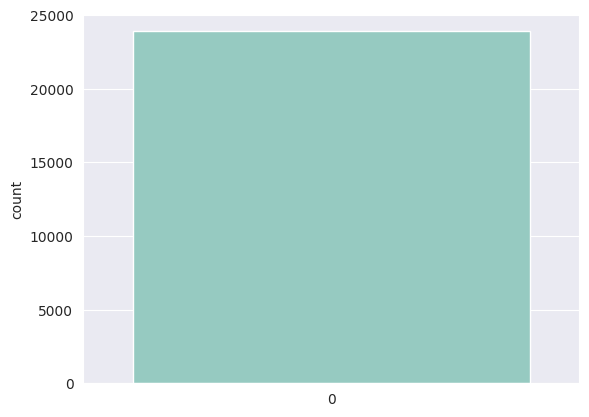

In [37]:
plt.style.use("dark_background")
sns.set_style('darkgrid')
sns.countplot(data.Bad_label)
plt.show()

#### This code configures the style of the plots, creates a countplot using Seaborn to visualize the distribution of values in the 'Bad_label' column, and then displays the plot with a dark background and gridlines for better visualization.

* In this plot we clearly see that 90% Customers have Good credit and 10% customers do not have Good credit.
* This target feature is not balanced.

# DATA PREPROCESSING / FEATURE ENGINEERING :-


### 1.CHECK MISSING VALUE :-

In [38]:
pd.set_option('display.max_rows',None)
data.isnull().sum()

Unnamed: 0             0
dt_opened              0
customer_no            0
entry_time            15
feature_1             15
feature_2           2836
feature_3           2836
feature_4             15
feature_5             15
feature_7             15
feature_8          22635
feature_9          22635
feature_10         23845
feature_11            15
feature_12            15
feature_13         13004
feature_14          7733
feature_15            23
feature_16            27
feature_17         22869
feature_18         23878
feature_19            15
feature_20             0
feature_21            15
feature_22             0
feature_23            15
feature_24           640
feature_25            15
feature_26            15
feature_27          3637
feature_28            15
feature_29            15
feature_30            15
feature_31            15
feature_32            15
feature_33            15
feature_34            15
feature_35            15
feature_36          5682
feature_37          5682


#### After executing this code, we will see a Series that displays the count of missing values in each column of the data DataFrame. By setting max_rows to None, we ensure that all rows are displayed when viewing the result. This is useful for checking the presence of missing data in our dataset.

* In this data set most of the feature contain missing     values with including unique feature.
* Numerical feature missing value impute with               Median/Mean.
* Categorical feature missing value impute with  mode(use   fillna function to impute categorical value).

In [39]:
#Create function to check missing value with percentage
def missing_value(data):
    null_value = data.isnull().sum()
    percentage = (data.isnull().sum()/data.isnull().count()*100)
    null_value = pd.concat([null_value,percentage],axis=1,keys=['Missing Number','Missing Percentage'])
    return null_value
missing_value(data)

Missing Number  Missing Percentage
Unnamed: 0                    0            0.000000
dt_opened                     0            0.000000
customer_no                   0            0.000000
entry_time                   15            0.062772
feature_1                    15            0.062772
feature_2                  2836           11.868095
feature_3                  2836           11.868095
feature_4                    15            0.062772
feature_5                    15            0.062772
feature_7                    15            0.062772
feature_8                 22635           94.722966
feature_9                 22635           94.722966
feature_10                23845           99.786575
feature_11                   15            0.062772
feature_12                   15            0.062772
feature_13                13004           54.419150
feature_14                 7733           32.361065
feature_15                   23            0.096250
feature_16                   27            0.112990
feature_17                22869           95.702210
feature_18                23878           99.924674
feature_19                   15            0.062772
feature_20                    0            0.000000
feature_21                   15            0.062772
feature_22                    0            0.000000
feature_23                   15            0.062772
feature_24                  640            2.678273
feature_25                   15            0.062772
feature_26                   15            0.062772
feature_27                 3637           15.220121
feature_28                   15            0.062772
feature_29                   15            0.062772
feature_30                   15            0.062772
feature_31                   15            0.062772
feature_32                   15            0.062772
feature_33                   15            0.062772
feature_34                   15            0.062772
feature_35                   15            0.062772
feature_36                 5682           23.778038
feature_37                 5682           23.778038
feature_38                 5682           23.778038
feature_39                   15            0.062772
feature_40                   15            0.062772
feature_41                   15            0.062772
feature_42                   15            0.062772
feature_43                   15            0.062772
feature_44                   15            0.062772
feature_45                13713           57.386173
feature_46                   94            0.393371
feature_47                    0            0.000000
feature_48                18399           76.996150
feature_49                23792           99.564781
feature_50                   15            0.062772
feature_51                11422           47.798795
feature_52                   15            0.062772
feature_53                11610           48.585537
feature_54                   15            0.062772
feature_55                   15            0.062772
feature_56                   15            0.062772
feature_57                21503           89.985772
feature_58                   15            0.062772
feature_59                   15            0.062772
feature_60                   15            0.062772
feature_61                23887           99.962337
feature_62                   15            0.062772
feature_63                   15            0.062772
feature_64                   15            0.062772
feature_65                   15            0.062772
feature_66                   15            0.062772
feature_67                   15            0.062772
feature_68                   15            0.062772
feature_69                   15            0.062772
feature_70                   15            0.062772
feature_71                   15            0.062772
feature_72                   15            0.062772
feature_73                20951           87.675762
feature_74   

#### def missing_value(data)::This line defines a Python function named missing_value that takes a DataFrame (data) as an input parameter.
#### null_value = data.isnull().sum():This line calculates the number of missing values in each column of the DataFrame data using the .isnull().sum() method. It stores the result in a Series called null_value.
#### percentage = (data.isnull().sum() / data.isnull().count() * 100):This line calculates the percentage of missing values in each column of the DataFrame data by dividing the number of missing values by the total count of values (both missing and non-missing) and then multiplying by 100. The result is stored in a Series called percentage
#### null_value = pd.concat([null_value, percentage], axis=1, keys=['Missing Number', 'Missing Percentage']):This line combines the two sets of information, the number of missing values (null_value) and the missing percentage (percentage), into a single DataFrame using the pd.concat() function. It sets column names ('Missing Number' and 'Missing Percentage') for the resulting DataFrame.
#### return null_value:This line returns the combined DataFrame containing information about missing values, which includes the number of missing values and the corresponding percentage for each column.



In [40]:
data_1 = ['feature_8','feature_9','feature_10','feature_13','feature_14','feature_17',
'feature_18','feature_38','feature_45',
'feature_49','feature_51','feature_53','feature_57','feature_61','feature_73','feature_74','amt_past_due']

#### In this list, each string element corresponds to the name of a feature or column in a dataset. These features are identified by their names, such as 'feature_8', 'feature_9', 'amt_past_due', and so on. This list can be used to reference or filter specific columns when working with a DataFrame, for example, when selecting or analyzing specific data columns.

In [41]:
data.drop(data_1, inplace=True, axis=1)

* 17 Features has more than 15% to 90% missing value and some unique feature also contain missing value so we drop this feature.
* Remaining feature missing value is less than 15% so we impute the missing value.

#### After executing this code, the columns listed in the data_1 list will be removed from the data DataFrame, and the DataFrame will be modified accordingly, with those columns no longer present.

In [42]:
data.isnull().sum().sum()

50089

#### The total count of missing values in the entire data DataFrame is 50089. This is a useful metric for assessing the overall data quality and identifying missing data in our dataset.

### Numerical :-

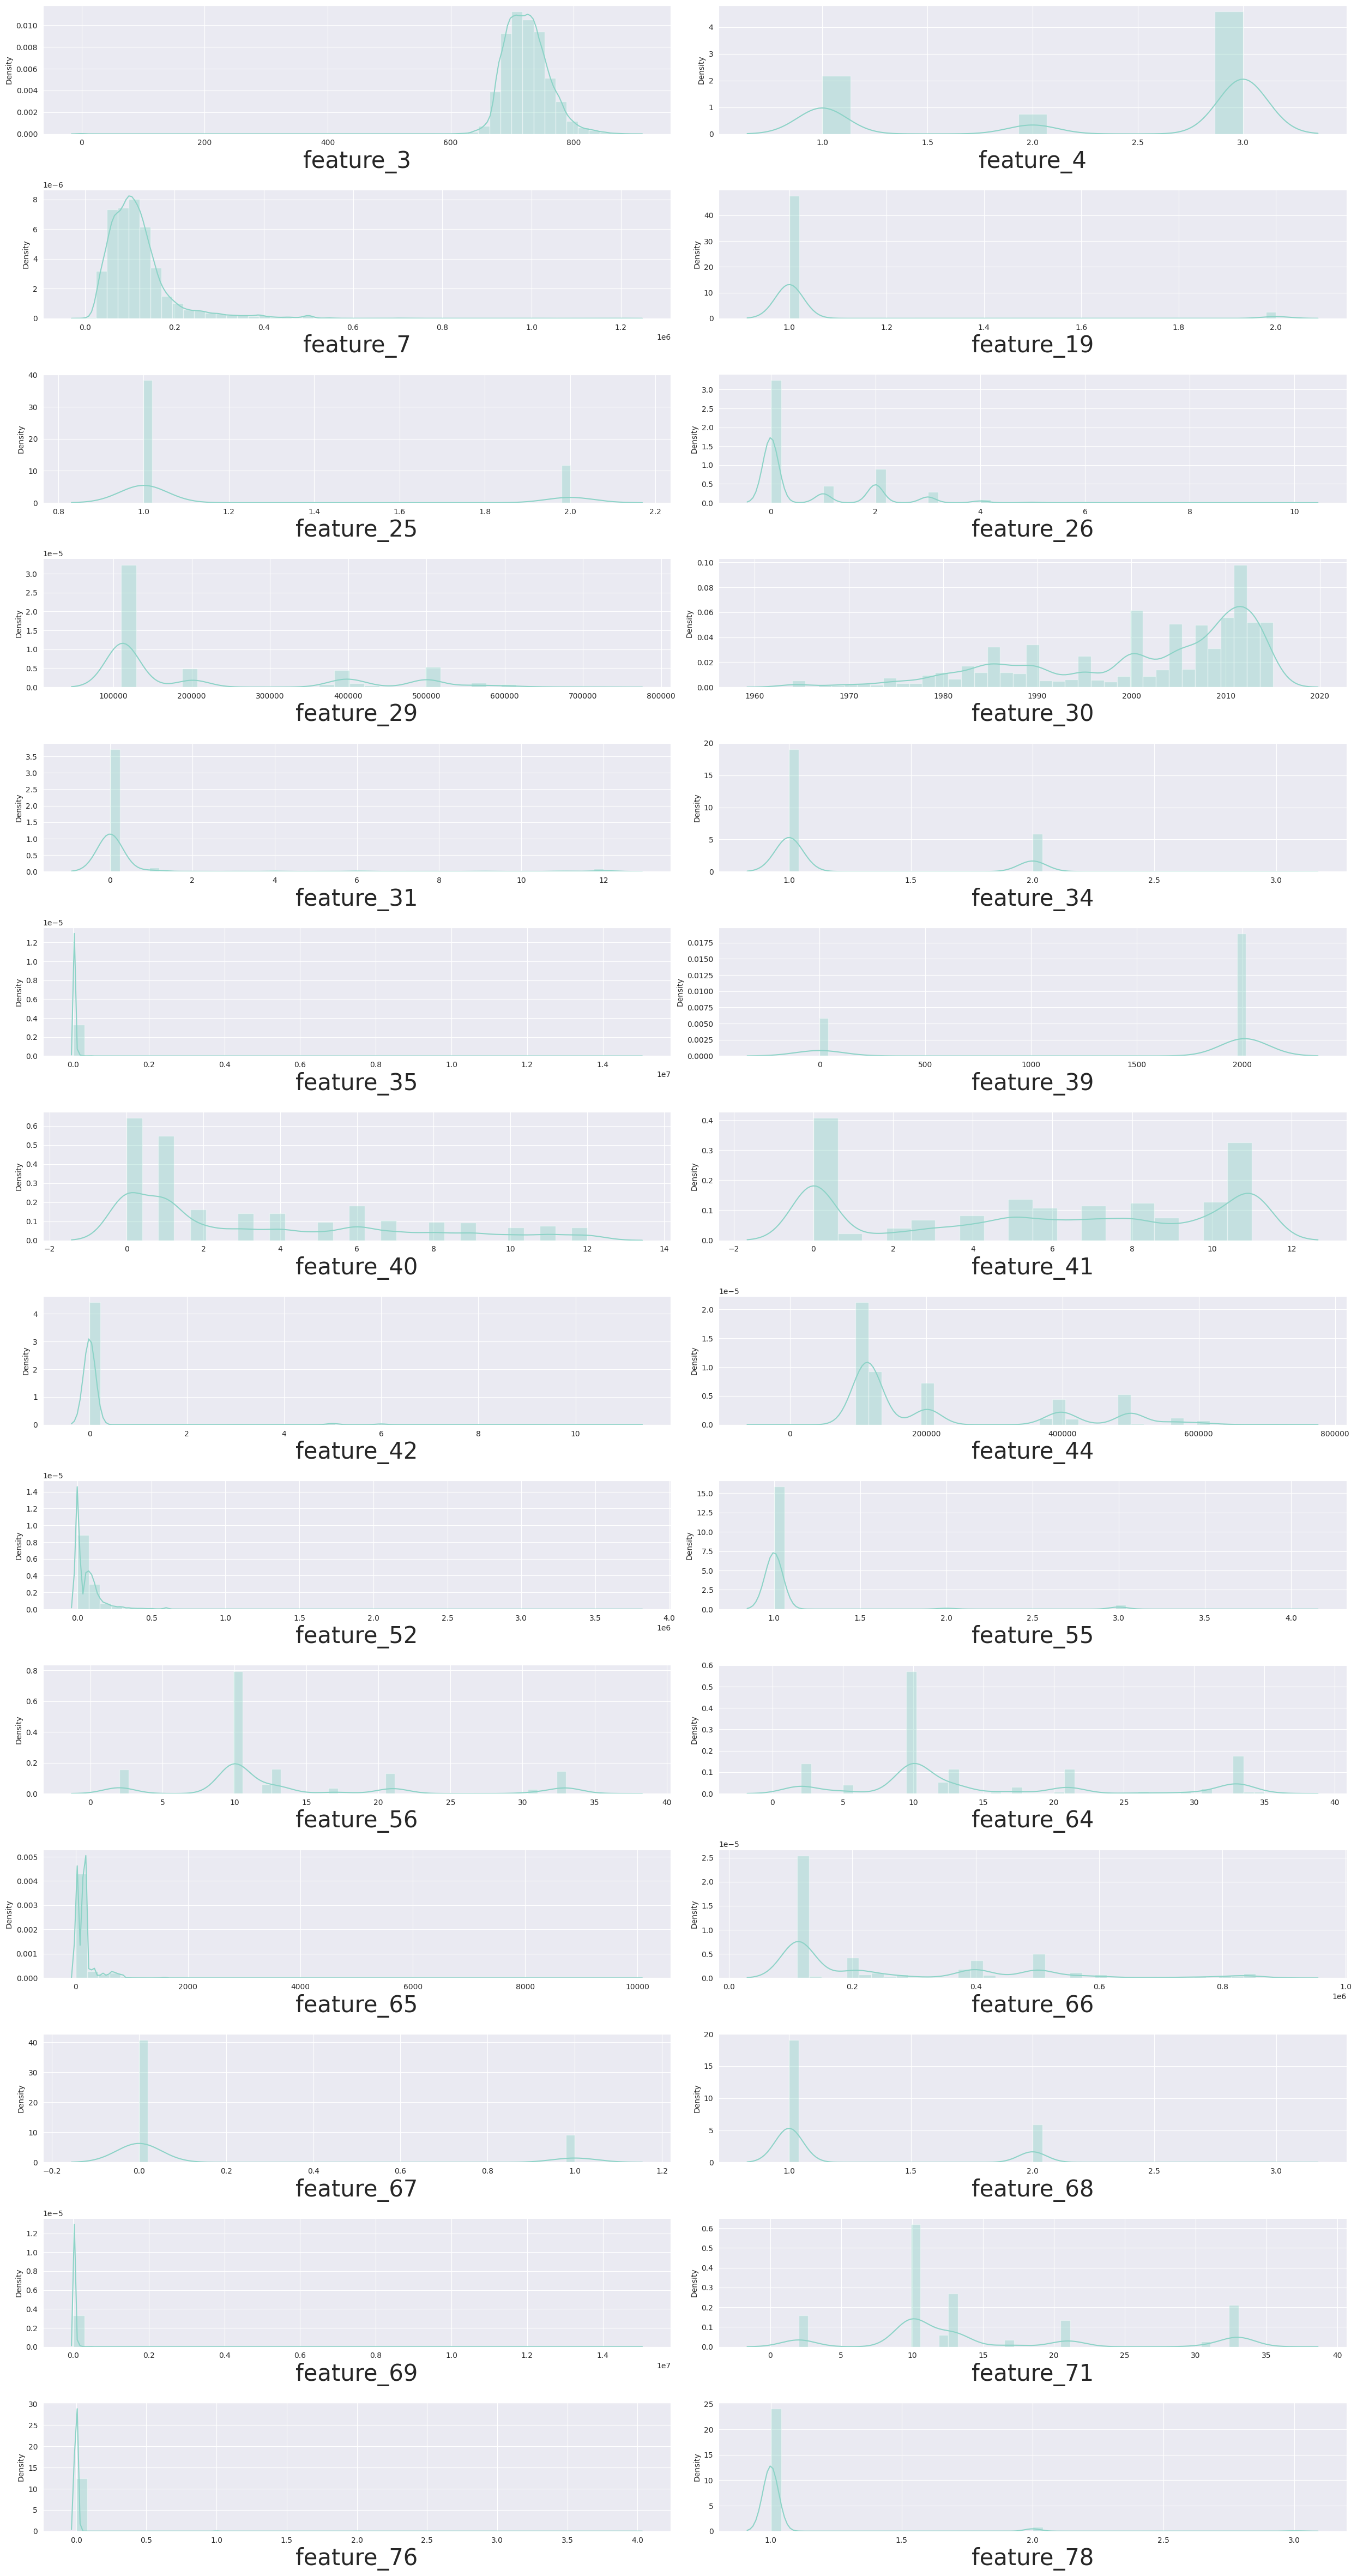

In [43]:
numerical_data = data[['feature_3','feature_4','feature_7','feature_19','feature_25','feature_26','feature_29','feature_30',
'feature_31','feature_34','feature_35','feature_39','feature_40','feature_41','feature_42','feature_44','feature_52',
'feature_55','feature_56','feature_64','feature_65','feature_66','feature_67','feature_68','feature_69','feature_71','feature_76',
'feature_78']]


sns.set_style('darkgrid')
plt.figure(figsize=(25,50)) # defining canvas size
plotnum = 1 # counter

for column in numerical_data: # iteration of columns / acessing the columns from  dataset
    if plotnum<=30:    # set the limit
        plt.subplot(15,2,plotnum) # # plotting 28 graphs (15-rows,2-columns) And plotnumber is for count
        sns.distplot(x=numerical_data[column]) # Plotting distribution plots
        plt.xlabel(column,fontsize=30)  # assigning name to x-axis and font size is 30

    plotnum+=1 # counter increment
plt.tight_layout()
plt.show()

* Impute missing value using median because disribution is not normal.

In [44]:
numerical_data.columns

Index(['feature_3', 'feature_4', 'feature_7', 'feature_19', 'feature_25',
       'feature_26', 'feature_29', 'feature_30', 'feature_31', 'feature_34',
       'feature_35', 'feature_39', 'feature_40', 'feature_41', 'feature_42',
       'feature_44', 'feature_52', 'feature_55', 'feature_56', 'feature_64',
       'feature_65', 'feature_66', 'feature_67', 'feature_68', 'feature_69',
       'feature_71', 'feature_76', 'feature_78'],
      dtype='object')

#### From the above code we receive a list or index of column names that are present in the numerical_data DataFrame. This can be useful for reviewing the names of the numerical columns in our dataset or for further data manipulation and analysis.

In [45]:
data[numerical_data.columns] = data[numerical_data.columns].fillna(data[numerical_data.columns].median())

#### The code essentially replaces missing values in the specified numerical columns with the median value of each column, ensuring that the dataset is filled with meaningful values for further analysis or modeling.

In [46]:
#Create function to check missing value with percentage
def missing_value(data):
    null_value = data.isnull().sum()
    percentage = (data.isnull().sum()/data.isnull().count()*100)
    null_value = pd.concat([null_value,percentage],axis=1,keys=['Missing Number','Missing Percentage'])
    return null_value
missing_value(data)

Missing Number  Missing Percentage
Unnamed: 0                    0            0.000000
dt_opened                     0            0.000000
customer_no                   0            0.000000
entry_time                   15            0.062772
feature_1                    15            0.062772
feature_2                  2836           11.868095
feature_3                     0            0.000000
feature_4                     0            0.000000
feature_5                    15            0.062772
feature_7                     0            0.000000
feature_11                   15            0.062772
feature_12                   15            0.062772
feature_15                   23            0.096250
feature_16                   27            0.112990
feature_19                    0            0.000000
feature_20                    0            0.000000
feature_21                   15            0.062772
feature_22                    0            0.000000
feature_23                   15            0.062772
feature_24                  640            2.678273
feature_25                    0            0.000000
feature_26                    0            0.000000
feature_27                 3637           15.220121
feature_28                   15            0.062772
feature_29                    0            0.000000
feature_30                    0            0.000000
feature_31                    0            0.000000
feature_32                   15            0.062772
feature_33                   15            0.062772
feature_34                    0            0.000000
feature_35                    0            0.000000
feature_36                 5682           23.778038
feature_37                 5682           23.778038
feature_39                    0            0.000000
feature_40                    0            0.000000
feature_41                    0            0.000000
feature_42                    0            0.000000
feature_43                   15            0.062772
feature_44                    0            0.000000
feature_46                   94            0.393371
feature_47                    0            0.000000
feature_48                18399           76.996150
feature_50                   15            0.062772
feature_52                    0            0.000000
feature_54                   15            0.062772
feature_55                    0            0.000000
feature_56                    0            0.000000
feature_58                   15            0.062772
feature_59                   15            0.062772
feature_60                   15            0.062772
feature_62                   15            0.062772
feature_63                   15            0.062772
feature_64                    0            0.000000
feature_65                    0            0.000000
feature_66                    0            0.000000
feature_67                    0            0.000000
feature_68                    0            0.000000
feature_69                    0            0.000000
feature_70                   15            0.062772
feature_71                    0            0.000000
feature_72                   15            0.062772
feature_75                   15            0.062772
feature_76                    0            0.000000
feature_77                    0            0.000000
feature_78                    0            0.000000
feature_79                   15            0.062772
Bad_label                     0            0.000000
high_credit_amt              13            0.054402
cur_balance_amt               0            0.000000
cashlimit                  5461           22.853197
creditlimit                4024           16.839638
customer_no.1                 0            0.000000
total_enq_count               0            0.000000
total_enq_amt                 0            0.000000

#### null_value = pd.concat([null_value, percentage], axis=1, keys=['Missing Number', 'Missing Percentage']):This line combines the two sets of information, the number of missing values (null_value) and the missing percentage (percentage), into a single DataFrame using the pd.concat() function. It sets column names ('Missing Number' and 'Missing Percentage') for the resulting DataFrame.
#### return null_value:This line returns the combined DataFrame containing information about missing values, which includes the number of missing values and the corresponding percentage for each column.

### Categorical :-
* mode(use fillna function to impute categorical value)

In [47]:
categorical_data = data[['entry_time','feature_1', 'feature_2', 'feature_5', 'feature_11','feature_12',
                         'feature_15','feature_16','feature_21','feature_23','feature_24','feature_27',
                         'feature_28','feature_32','feature_33','feature_36','feature_37','feature_43',
                         'feature_46','feature_48','feature_50','feature_54','feature_58','feature_59',
                         'feature_60','feature_62','feature_63','feature_70','feature_72','feature_75',
                         'feature_79','high_credit_amt','cashlimit','creditlimit']]

#### By creating this categorical_data DataFrame, we can work specifically with the categorical columns for analysis, visualization, or any other operations that are relevant to non-numeric data.

In [48]:
categorical_data.columns

Index(['entry_time', 'feature_1', 'feature_2', 'feature_5', 'feature_11',
       'feature_12', 'feature_15', 'feature_16', 'feature_21', 'feature_23',
       'feature_24', 'feature_27', 'feature_28', 'feature_32', 'feature_33',
       'feature_36', 'feature_37', 'feature_43', 'feature_46', 'feature_48',
       'feature_50', 'feature_54', 'feature_58', 'feature_59', 'feature_60',
       'feature_62', 'feature_63', 'feature_70', 'feature_72', 'feature_75',
       'feature_79', 'high_credit_amt', 'cashlimit', 'creditlimit'],
      dtype='object')

#### When we execute categorical_data.columns, we will receive a list or index of column names that are present in the categorical_data DataFrame. This can be useful for reviewing the names of the categorical columns in our dataset or for further data manipulation and analysis.

In [49]:
data['entry_time'] = data['entry_time'].fillna(data['entry_time'].mode()[0])
data['feature_1'] = data['feature_1'].fillna(data['feature_1'].mode()[0])
data['feature_2'] = data['feature_2'].fillna(data['feature_2'].mode()[0])
data['feature_5'] = data['feature_5'].fillna(data['feature_5'].mode()[0])
data['feature_11'] = data['feature_11'].fillna(data['feature_11'].mode()[0])
data['feature_12'] = data['feature_12'].fillna(data['feature_12'].mode()[0])
data['feature_15'] = data['feature_15'].fillna(data['feature_15'].mode()[0])
data['feature_16'] = data['feature_16'].fillna(data['feature_16'].mode()[0])
data['feature_21'] = data['feature_21'].fillna(data['feature_21'].mode()[0])
data['feature_23'] = data['feature_23'].fillna(data['feature_23'].mode()[0])
data['feature_24'] = data['feature_24'].fillna(data['feature_24'].mode()[0])
data['feature_27'] = data['feature_27'].fillna(data['feature_27'].mode()[0])
data['feature_28'] = data['feature_28'].fillna(data['feature_28'].mode()[0])
data['feature_32'] = data['feature_32'].fillna(data['feature_32'].mode()[0])
data['feature_33'] = data['feature_33'].fillna(data['feature_33'].mode()[0])
data['feature_36'] = data['feature_36'].fillna(data['feature_36'].mode()[0])
data['feature_37'] = data['feature_37'].fillna(data['feature_37'].mode()[0])
data['feature_43'] = data['feature_43'].fillna(data['feature_43'].mode()[0])
data['feature_46'] = data['feature_46'].fillna(data['feature_46'].mode()[0])
data['feature_48'] = data['feature_48'].fillna(data['feature_48'].mode()[0])
data['feature_50'] = data['feature_50'].fillna(data['feature_50'].mode()[0])
data['feature_54'] = data['feature_54'].fillna(data['feature_54'].mode()[0])
data['feature_58'] = data['feature_58'].fillna(data['feature_58'].mode()[0])
data['feature_59'] = data['feature_59'].fillna(data['feature_59'].mode()[0])
data['feature_60'] = data['feature_60'].fillna(data['feature_60'].mode()[0])
data['feature_62'] = data['feature_62'].fillna(data['feature_62'].mode()[0])
data['feature_63'] = data['feature_63'].fillna(data['feature_63'].mode()[0])
data['feature_70'] = data['feature_70'].fillna(data['feature_70'].mode()[0])
data['feature_72'] = data['feature_72'].fillna(data['feature_72'].mode()[0])
data['feature_75'] = data['feature_75'].fillna(data['feature_75'].mode()[0])
data['feature_79'] = data['feature_79'].fillna(data['feature_79'].mode()[0])
data['high_credit_amt'] = data['high_credit_amt'].fillna(data['high_credit_amt'].mode()[0])
data['cashlimit'] = data['cashlimit'].fillna(data['cashlimit'].mode()[0])
data['creditlimit'] = data['creditlimit'].fillna(data['creditlimit'].mode()[0])


#### The above code effectively replaces missing values in each of the specified columns with the most frequent value found in that column, ensuring that the dataset is filled with meaningful data for analysis or modeling.


In [50]:
#Create function to check missing value with percentage
def missing_value(data):
    null_value = data.isnull().sum()
    percentage = (data.isnull().sum()/data.isnull().count()*100)
    null_value = pd.concat([null_value,percentage],axis=1,keys=['Missing Number','Missing Percentage'])
    return null_value
missing_value(data)

Missing Number  Missing Percentage
Unnamed: 0                    0                 0.0
dt_opened                     0                 0.0
customer_no                   0                 0.0
entry_time                    0                 0.0
feature_1                     0                 0.0
feature_2                     0                 0.0
feature_3                     0                 0.0
feature_4                     0                 0.0
feature_5                     0                 0.0
feature_7                     0                 0.0
feature_11                    0                 0.0
feature_12                    0                 0.0
feature_15                    0                 0.0
feature_16                    0                 0.0
feature_19                    0                 0.0
feature_20                    0                 0.0
feature_21                    0                 0.0
feature_22                    0                 0.0
feature_23                    0                 0.0
feature_24                    0                 0.0
feature_25                    0                 0.0
feature_26                    0                 0.0
feature_27                    0                 0.0
feature_28                    0                 0.0
feature_29                    0                 0.0
feature_30                    0                 0.0
feature_31                    0                 0.0
feature_32                    0                 0.0
feature_33                    0                 0.0
feature_34                    0                 0.0
feature_35                    0                 0.0
feature_36                    0                 0.0
feature_37                    0                 0.0
feature_39                    0                 0.0
feature_40                    0                 0.0
feature_41                    0                 0.0
feature_42                    0                 0.0
feature_43                    0                 0.0
feature_44                    0                 0.0
feature_46                    0                 0.0
feature_47                    0                 0.0
feature_48                    0                 0.0
feature_50                    0                 0.0
feature_52                    0                 0.0
feature_54                    0                 0.0
feature_55                    0                 0.0
feature_56                    0                 0.0
feature_58                    0                 0.0
feature_59                    0                 0.0
feature_60                    0                 0.0
feature_62                    0                 0.0
feature_63                    0                 0.0
feature_64                    0                 0.0
feature_65                    0                 0.0
feature_66                    0                 0.0
feature_67                    0                 0.0
feature_68                    0                 0.0
feature_69                    0                 0.0
feature_70                    0                 0.0
feature_71                    0                 0.0
feature_72                    0                 0.0
feature_75                    0                 0.0
feature_76                    0                 0.0
feature_77                    0                 0.0
feature_78                    0                 0.0
feature_79                    0                 0.0
Bad_label                     0                 0.0
high_credit_amt               0                 0.0
cur_balance_amt               0                 0.0
cashlimit                     0                 0.0
creditlimit                   0                 0.0
customer_no.1                 0                 0.0
total_enq_count               0                 0.0
total_enq_amt                 0                 0.0

#### The above code returns the combined DataFrame containing information about missing values, which includes the number of missing values and the corresponding percentage for each column.

# CONVERT CATEGORICAL TO NUMERICAL:-

### Label Encoding :-
* categorical feature converts to numerical

In [51]:
data.head()

Unnamed: 0 dt_opened  customer_no entry_time feature_1 feature_2  \
0           0   18Apr15            1    13Apr15  Insignia   13Apr15   
1           1   21Apr15            2    21Apr15  Insignia   21Apr15   
2           2   22Apr15            3    21Apr15  Insignia   21Apr15   
3           3   25Apr15            4    15Apr15  Insignia   20Apr15   
4           4   06May15            5    30Apr15  Insignia   19Oct15   

   feature_3  feature_4   feature_5  feature_7 feature_11 feature_12  \
0      650.0        2.0  Card Setup   500000.0          Y        IS1   
1      760.0        1.0  Card Setup  1200000.0          Y        IS1   
2      774.0        1.0  Card Setup   700000.0          Y        IS1   
3      770.0        1.0  Card Setup   500000.0          Y        IS1   
4      721.0        3.0  Card Setup   500000.0          Y        IS1   

  feature_15 feature_16  feature_19  feature_20 feature_21  feature_22  \
0        159       4284         1.0  ADFPNXXXXX    03Sep65  98332XXXXX   
1         91       B001         1.0  AJWPRXXXXX    14Jul62  99455XXXXX   
2         91       B001         2.0  AFAPNXXXXX    10Apr66  98456XXXXX   
3        157       5107         1.0  AAAPDXXXXX    16Apr64  98220XXXXX   
4        100       D016         1.0  ABEPSXXXXX    03Jan54  98111XXXXX   

  feature_23       feature_24  feature_25  feature_26 feature_27  \
0          N    REDIFFMAILCOM         1.0         2.0   Graduate   
1          N         GMAILCOM         1.0         2.0   Graduate   
2          N  SHOBANARAYANCOM         1.0         0.0   Graduate   
3          N          VSNLCOM         1.0         3.0   Graduate   
4          N    REDIFFMAILCOM         1.0         3.0   Graduate   

                   feature_28  feature_29  feature_30  feature_31 feature_32  \
0  Mumbai  Navi Mumbai  Thane    400610.0      1965.0         0.0       Self   
1                   Bengaluru    560042.0      1969.0         0.0       Self   
2                   Bengaluru    560042.0      1966.0         0.0       Self   
3                        Pune    411001.0      1988.0         0.0       Self   
4                     Gurgaon    122009.0      1995.0         0.0       Self   

  feature_33  feature_34  feature_35      feature_36  \
0          Y         2.0     90000.0  Private Ltd Co   
1          Y         2.0         1.0  Private Ltd Co   
2          Y         2.0         1.0  Private Ltd Co   
3          Y         2.0    100000.0  Private Ltd Co   
4          Y         2.0    300000.0  Private Ltd Co   

                  feature_37  feature_39  feature_40  feature_41  feature_42  \
0  BankingFinancial Services         0.0         0.0         0.0         0.0   
1  BankingFinancial Services         0.0         0.0         0.0         0.0   
2  BankingFinancial Services         0.0         0.0         0.0         0.0   
3  BankingFinancial Services         0.0         0.0         0.0         0.0   
4  BankingFinancial Services         0.0         0.0         0.0         0.0   

  feature_43  feature_44 feature_46  feature_47             feature_48  \
0     Mumbai    400059.0   PAN Card  ADFPNXXXXX  The Ratnakar Bank Ltd   
1  Bangalore    560042.0   PAN Card  AJWPRXXXXX  The Ratnakar Bank Ltd   
2  Bangalore    560042.0   PAN Card  AFAPNXXXXX              HDFC Bank   
3       Pune    411026.0   PAN Card  AAAPDXXXXX  The Ratnakar Bank Ltd   
4    Gurgaon    122009.0   PAN Card  ABEPSXXXXX  The Ratnakar Bank Ltd   

  feature_50  feature_52 feature_54  feature_55  feature_56 feature_58  \
0          Y         0.0    17Jun16         1.0        21.0          Y   
1          N         0.0    17Jun16         1.0        17.0          Y   
2          N         0.0    17Jun16         3.0        17.0          N   
3          Y         0.0    17Jun16         1.0        21.0          Y   
4          N         0.0    17Jun16         1.0        13.0          Y   

  feature_59 feature_60 feature_62 feature_63  feature_64  feature_65  \
0          Y          N    

In [52]:
categorical_data.columns

Index(['entry_time', 'feature_1', 'feature_2', 'feature_5', 'feature_11',
       'feature_12', 'feature_15', 'feature_16', 'feature_21', 'feature_23',
       'feature_24', 'feature_27', 'feature_28', 'feature_32', 'feature_33',
       'feature_36', 'feature_37', 'feature_43', 'feature_46', 'feature_48',
       'feature_50', 'feature_54', 'feature_58', 'feature_59', 'feature_60',
       'feature_62', 'feature_63', 'feature_70', 'feature_72', 'feature_75',
       'feature_79', 'high_credit_amt', 'cashlimit', 'creditlimit'],
      dtype='object')

#### This information is valuable for reviewing and referencing the names of categorical columns in the dataset, which is helpful for data analysis and manipulation tasks specific to categorical data.

In [53]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data.entry_time=label.fit_transform(data.entry_time)
data.feature_1=label.fit_transform(data.feature_1)
data.feature_2=label.fit_transform(data.feature_2)
data.feature_5=label.fit_transform(data.feature_5)
data.feature_11=label.fit_transform(data.feature_11)
data.feature_12=label.fit_transform(data.feature_12)
data.feature_15=label.fit_transform(data.feature_15)
data.feature_16=label.fit_transform(data.feature_16)
data.feature_21=label.fit_transform(data.feature_21)
data.feature_23=label.fit_transform(data.feature_23)
data.feature_24=label.fit_transform(data.feature_24)
data.feature_27=label.fit_transform(data.feature_27)
data.feature_28=label.fit_transform(data.feature_28)
data.feature_32=label.fit_transform(data.feature_32)
data.feature_33=label.fit_transform(data.feature_33)
data.feature_36=label.fit_transform(data.feature_36)
data.feature_37=label.fit_transform(data.feature_37)
data.feature_43=label.fit_transform(data.feature_43)
data.feature_46=label.fit_transform(data.feature_46)
data.feature_48=label.fit_transform(data.feature_48)
data.feature_50=label.fit_transform(data.feature_50)
data.feature_54=label.fit_transform(data.feature_54)
data.feature_58=label.fit_transform(data.feature_58)
data.feature_59=label.fit_transform(data.feature_59)
data.feature_60=label.fit_transform(data.feature_60)
data.feature_62=label.fit_transform(data.feature_62)
data.feature_63=label.fit_transform(data.feature_63)
data.feature_70=label.fit_transform(data.feature_70)
data.feature_72=label.fit_transform(data.feature_72)
data.feature_75=label.fit_transform(data.feature_75)
data.feature_79=label.fit_transform(data.feature_79)
data.high_credit_amt=label.fit_transform(data.high_credit_amt)
data.creditlimit=label.fit_transform(data.creditlimit)
data.cashlimit=label.fit_transform(data.cashlimit)
data.cur_balance_amt=label.fit_transform(data.cur_balance_amt)

#### The LabelEncoder is used to convert categorical data into numerical values.
#### label = LabelEncoder()-This line creates an instance of the LabelEncoder class, which will be used to perform the label encoding.
#### data.entry_time = label.fit_transform(data.entry_time)-This line encodes the 'entry_time' column in the data DataFrame. It replaces the categorical values in this column with numerical labels using the fit_transform method of the LabelEncoder instance.
#### Similar encoding is performed for multiple columns, such as 'feature_1', 'feature_2', 'feature_5', and so on, using the same LabelEncoder instance.Each line follows the same pattern: the specified column is encoded, replacing its categorical values with numerical labels.

In [54]:
data.head()

Unnamed: 0 dt_opened  customer_no  entry_time  feature_1  feature_2  \
0           0   18Apr15            1         116          1        108   
1           1   21Apr15            2         198          1        186   
2           2   22Apr15            3         198          1        186   
3           3   25Apr15            4         138          1        177   
4           4   06May15            5         282          1        175   

   feature_3  feature_4  feature_5  feature_7  feature_11  feature_12  \
0      650.0        2.0          0   500000.0           1           3   
1      760.0        1.0          0  1200000.0           1           3   
2      774.0        1.0          0   700000.0           1           3   
3      770.0        1.0          0   500000.0           1           3   
4      721.0        3.0          0   500000.0           1           3   

   feature_15  feature_16  feature_19  feature_20  feature_21  feature_22  \
0          25          41         1.0  ADFPNXXXXX         936  98332XXXXX   
1          85         146         1.0  AJWPRXXXXX        3966  99455XXXXX   
2          85         146         2.0  AFAPNXXXXX        2676  98456XXXXX   
3          23          56         1.0  AAAPDXXXXX        4468  98220XXXXX   
4           2         183         1.0  ABEPSXXXXX         763  98111XXXXX   

   feature_23  feature_24  feature_25  feature_26  feature_27  feature_28  \
0           0         467         1.0         2.0           5          39   
1           0         193         1.0         2.0           5           9   
2           0         505         1.0         0.0           5           9   
3           0         595         1.0         3.0           5          45   
4           0         467         1.0         3.0           5          23   

   feature_29  feature_30  feature_31  feature_32  feature_33  feature_34  \
0    400610.0      1965.0         0.0           4           1         2.0   
1    560042.0      1969.0         0.0           4           1         2.0   
2    560042.0      1966.0         0.0           4           1         2.0   
3    411001.0      1988.0         0.0           4           1         2.0   
4    122009.0      1995.0         0.0           4           1         2.0   

   feature_35  feature_36  feature_37  feature_39  feature_40  feature_41  \
0     90000.0           6           1         0.0         0.0         0.0   
1         1.0           6           1         0.0         0.0         0.0   
2         1.0           6           1         0.0         0.0         0.0   
3    100000.0           6           1         0.0         0.0         0.0   
4    300000.0           6           1         0.0         0.0         0.0   

   feature_42  feature_43  feature_44  feature_46  feature_47  feature_48  \
0         0.0          43    400059.0           2  ADFPNXXXXX          50   
1         0.0           6    560042.0           2  AJWPRXXXXX          50   
2         0.0           6    560042.0           2  AFAPNXXXXX          19   
3         0.0          51    411026.0           2  AAAPDXXXXX          50   
4         0.0          28    122009.0           2  ABEPSXXXXX          50   

   feature_50  feature_52  feature_54  feature_55  feature_56  feature_58  \
0           1         0.0           0         1.0        21.0           1   
1           0         0.0           0         1.0        17.0           1   
2           0         0.0           0         3.0        17.0           0   
3           1         0.0           0         1.0        21.0           1   
4           0         0.0           0         1.0        13.0           1   

   feature_59  feature_60  feature_62  feature_63  feature_64  feature_65  \
0           1           0           1           1        21.0        15.0   
1           1           0           1          13        17.0        12.0   
2           1           0           1           4        17.0        12.0   
3           1           0        

# OUTLIER HANDLING :-

In [55]:
len(data.columns)

74

#### The above code calculates and displays the total number of columns in the data DataFrame. This information is useful for understanding the dimensionality of the dataset and is often used in data exploration and analysis.

In [56]:
data_2 = data[['entry_time', 'feature_1',
       'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_7',
       'feature_11', 'feature_12', 'feature_15', 'feature_16', 'feature_19',
       'feature_21', 'feature_23', 'feature_24',
       'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29',
       'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34',
       'feature_35', 'feature_36', 'feature_37', 'feature_39', 'feature_40',
       'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_46',
       'feature_48', 'feature_50', 'feature_52', 'feature_54',
       'feature_55', 'feature_56', 'feature_58', 'feature_59', 'feature_60',
       'feature_62', 'feature_63', 'feature_64', 'feature_65', 'feature_66',
       'feature_67', 'feature_68', 'feature_69', 'feature_70', 'feature_71',
       'feature_72', 'feature_75', 'feature_76', 'feature_78',
       'feature_79','high_credit_amt', 'cur_balance_amt',
       'cashlimit', 'creditlimit', 'customer_no.1', 'total_enq_count',
       'total_enq_amt']]

#### data_2 contains a subset of columns from the original dataset that we have selected for further analysis, modeling.

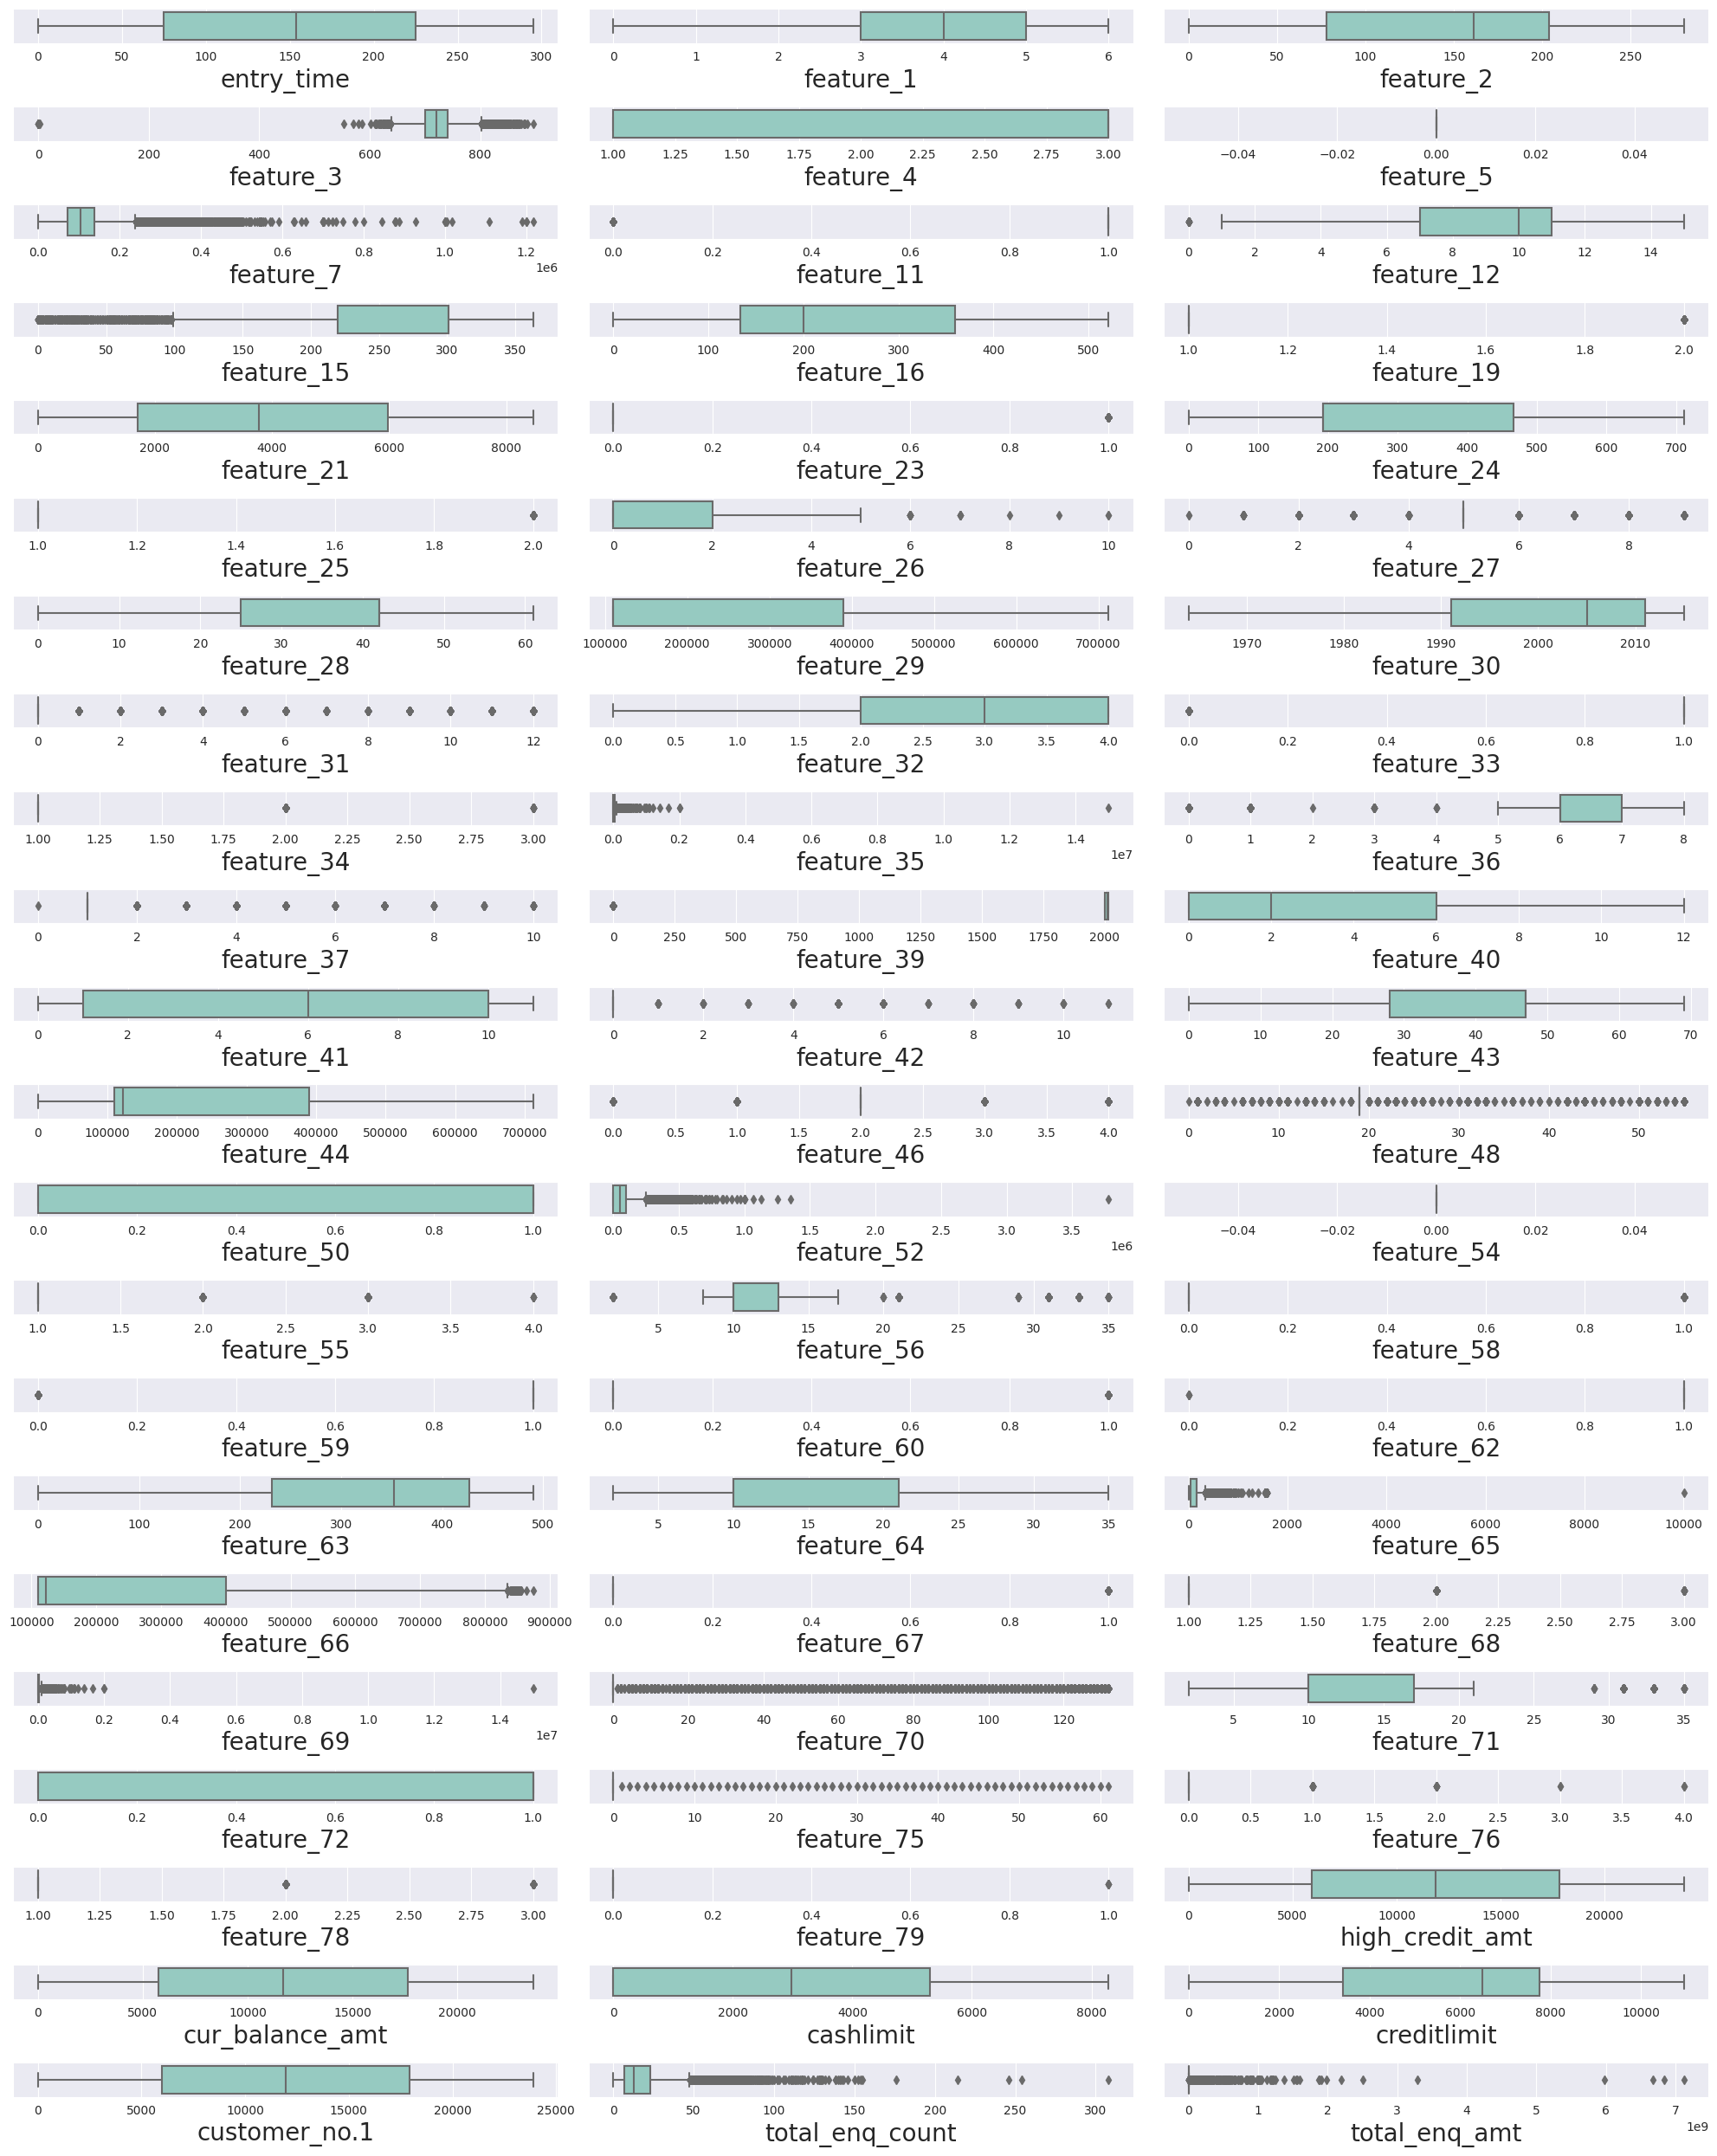

In [57]:
plt.figure(figsize=(20,25)) # defining canvas size
plotnum = 1 # counter

for column in data_2: # iteration of columns / acessing the columns from  dataset
    if plotnum<=70:    # set the limit
        plt.subplot(22,3,plotnum) # # plotting  graphs (22-rows,3-columns) and plotnumber is for count
        sns.boxplot(x = data[column]) # Plotting box plots
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotnum+=1 # counter increment
plt.tight_layout() # subplots are neatly arranged within the canvas.
plt.show() # displays the entire set of subplots as a visualization.

#### The above code effectively generates a grid of box plots, each showing the distribution of a specific numerical feature in the dataset, helping to identify outliers and understand the data's statistical properties.

* From the above EDA we see the features as private information.
* We are not imputing the outlier, we are scaling to robust the outlier.

#  FEATURE SCALING :-

### Robust Scaler :-
* Robust scaler is a feature scaling technique that helps bring numerical features to a consistent scale while being robust to outliers, making it particularly useful for datasets with extreme values or non-standard distributions.By using the median and IQR, it is less influenced by extreme values compared to other scaling methods like the Standard Scaler or Min-Max Scaler.

In [58]:
data.head()

Unnamed: 0 dt_opened  customer_no  entry_time  feature_1  feature_2  \
0           0   18Apr15            1         116          1        108   
1           1   21Apr15            2         198          1        186   
2           2   22Apr15            3         198          1        186   
3           3   25Apr15            4         138          1        177   
4           4   06May15            5         282          1        175   

   feature_3  feature_4  feature_5  feature_7  feature_11  feature_12  \
0      650.0        2.0          0   500000.0           1           3   
1      760.0        1.0          0  1200000.0           1           3   
2      774.0        1.0          0   700000.0           1           3   
3      770.0        1.0          0   500000.0           1           3   
4      721.0        3.0          0   500000.0           1           3   

   feature_15  feature_16  feature_19  feature_20  feature_21  feature_22  \
0          25          41         1.0  ADFPNXXXXX         936  98332XXXXX   
1          85         146         1.0  AJWPRXXXXX        3966  99455XXXXX   
2          85         146         2.0  AFAPNXXXXX        2676  98456XXXXX   
3          23          56         1.0  AAAPDXXXXX        4468  98220XXXXX   
4           2         183         1.0  ABEPSXXXXX         763  98111XXXXX   

   feature_23  feature_24  feature_25  feature_26  feature_27  feature_28  \
0           0         467         1.0         2.0           5          39   
1           0         193         1.0         2.0           5           9   
2           0         505         1.0         0.0           5           9   
3           0         595         1.0         3.0           5          45   
4           0         467         1.0         3.0           5          23   

   feature_29  feature_30  feature_31  feature_32  feature_33  feature_34  \
0    400610.0      1965.0         0.0           4           1         2.0   
1    560042.0      1969.0         0.0           4           1         2.0   
2    560042.0      1966.0         0.0           4           1         2.0   
3    411001.0      1988.0         0.0           4           1         2.0   
4    122009.0      1995.0         0.0           4           1         2.0   

   feature_35  feature_36  feature_37  feature_39  feature_40  feature_41  \
0     90000.0           6           1         0.0         0.0         0.0   
1         1.0           6           1         0.0         0.0         0.0   
2         1.0           6           1         0.0         0.0         0.0   
3    100000.0           6           1         0.0         0.0         0.0   
4    300000.0           6           1         0.0         0.0         0.0   

   feature_42  feature_43  feature_44  feature_46  feature_47  feature_48  \
0         0.0          43    400059.0           2  ADFPNXXXXX          50   
1         0.0           6    560042.0           2  AJWPRXXXXX          50   
2         0.0           6    560042.0           2  AFAPNXXXXX          19   
3         0.0          51    411026.0           2  AAAPDXXXXX          50   
4         0.0          28    122009.0           2  ABEPSXXXXX          50   

   feature_50  feature_52  feature_54  feature_55  feature_56  feature_58  \
0           1         0.0           0         1.0        21.0           1   
1           0         0.0           0         1.0        17.0           1   
2           0         0.0           0         3.0        17.0           0   
3           1         0.0           0         1.0        21.0           1   
4           0         0.0           0         1.0        13.0           1   

   feature_59  feature_60  feature_62  feature_63  feature_64  feature_65  \
0           1           0           1           1        21.0        15.0   
1           1           0           1          13        17.0        12.0   
2           1           0           1           4        17.0        12.0   
3           1           0        

In [59]:
# Robust scaler
from sklearn.preprocessing import RobustScaler
scale = RobustScaler()
data[data_2.columns]=scale.fit_transform(data[data_2.columns])

#### The RobustScaler's robustness to outliers makes it particularly suitable when dealing with datasets that contain extreme values. By applying this scaler to the selected numerical features, we are ensuring that the features are scaled appropriately while considering the presence of outliers in the data.

In [60]:
data.head()

Unnamed: 0 dt_opened  customer_no  entry_time  feature_1  feature_2  \
0           0   18Apr15            1   -0.253333       -1.5  -0.420635   
1           1   21Apr15            2    0.293333       -1.5   0.198413   
2           2   22Apr15            3    0.293333       -1.5   0.198413   
3           3   25Apr15            4   -0.106667       -1.5   0.126984   
4           4   06May15            5    0.853333       -1.5   0.111111   

   feature_3  feature_4  feature_5  feature_7  feature_11  feature_12  \
0  -1.731707       -0.5        0.0   5.910448         0.0       -1.75   
1   0.951220       -1.0        0.0  16.358209         0.0       -1.75   
2   1.292683       -1.0        0.0   8.895522         0.0       -1.75   
3   1.195122       -1.0        0.0   5.910448         0.0       -1.75   
4   0.000000        0.0        0.0   5.910448         0.0       -1.75   

   feature_15  feature_16  feature_19  feature_20  feature_21  feature_22  \
0   -3.407407   -0.703540         0.0  ADFPNXXXXX   -0.663823  98332XXXXX   
1   -2.666667   -0.238938         0.0  AJWPRXXXXX    0.044411  99455XXXXX   
2   -2.666667   -0.238938         1.0  AFAPNXXXXX   -0.257114  98456XXXXX   
3   -3.432099   -0.637168         0.0  AAAPDXXXXX    0.161748  98220XXXXX   
4   -3.691358   -0.075221         0.0  ABEPSXXXXX   -0.704260  98111XXXXX   

   feature_23  feature_24  feature_25  feature_26  feature_27  feature_28  \
0         0.0    1.000000         0.0         1.0         0.0   -0.176471   
1         0.0    0.000000         0.0         1.0         0.0   -1.941176   
2         0.0    1.138686         0.0         0.0         0.0   -1.941176   
3         0.0    1.467153         0.0         1.5         0.0    0.176471   
4         0.0    1.000000         0.0         1.5         0.0   -1.117647   

   feature_29  feature_30  feature_31  feature_32  feature_33  feature_34  \
0    1.037739       -2.00         0.0         0.5         0.0         1.0   
1    1.607238       -1.80         0.0         0.5         0.0         1.0   
2    1.607238       -1.95         0.0         0.5         0.0         1.0   
3    1.074856       -0.85         0.0         0.5         0.0         1.0   
4    0.042561       -0.50         0.0         0.5         0.0         1.0   

   feature_35  feature_36  feature_37  feature_39  feature_40  feature_41  \
0    1.395381         0.0         0.0 -143.571429   -0.333333   -0.666667   
1   -0.697667         0.0         0.0 -143.571429   -0.333333   -0.666667   
2   -0.697667         0.0         0.0 -143.571429   -0.333333   -0.666667   
3    1.627945         0.0         0.0 -143.571429   -0.333333   -0.666667   
4    6.279216         0.0         0.0 -143.571429   -0.333333   -0.666667   

   feature_42  feature_43  feature_44  feature_46  feature_47  feature_48  \
0         0.0   -0.210526    0.993213         0.0  ADFPNXXXXX        31.0   
1         0.0   -2.157895    1.564667         0.0  AJWPRXXXXX        31.0   
2         0.0   -2.157895    1.564667         0.0  AFAPNXXXXX         0.0   
3         0.0    0.210526    1.032387         0.0  AAAPDXXXXX        31.0   
4         0.0   -1.000000    0.000029         0.0  ABEPSXXXXX        31.0   

   feature_50  feature_52  feature_54  feature_55  feature_56  feature_58  \
0         0.0        -0.5         0.0         0.0    3.666667         1.0   
1        -1.0        -0.5         0.0         0.0    2.333333         1.0   
2        -1.0        -0.5         0.0         2.0    2.333333         0.0   
3         0.0        -0.5         0.0         0.0    3.666667         1.0   
4        -1.0        -0.5         0.0         0.0    1.000000         1.0   

   feature_59  feature_60  feature_62  feature_63  feature_64  feature_65  \
0         0.0         0.0         0.0   -1.797695    1.000000   -1.203390   
1         0.0         0.0         0.0   -1.736236    0.636364   -1.228814   
2         0.0         0.0         0.0   -1.782330    0.636364   -1.228814   
3         0.0         0.0        

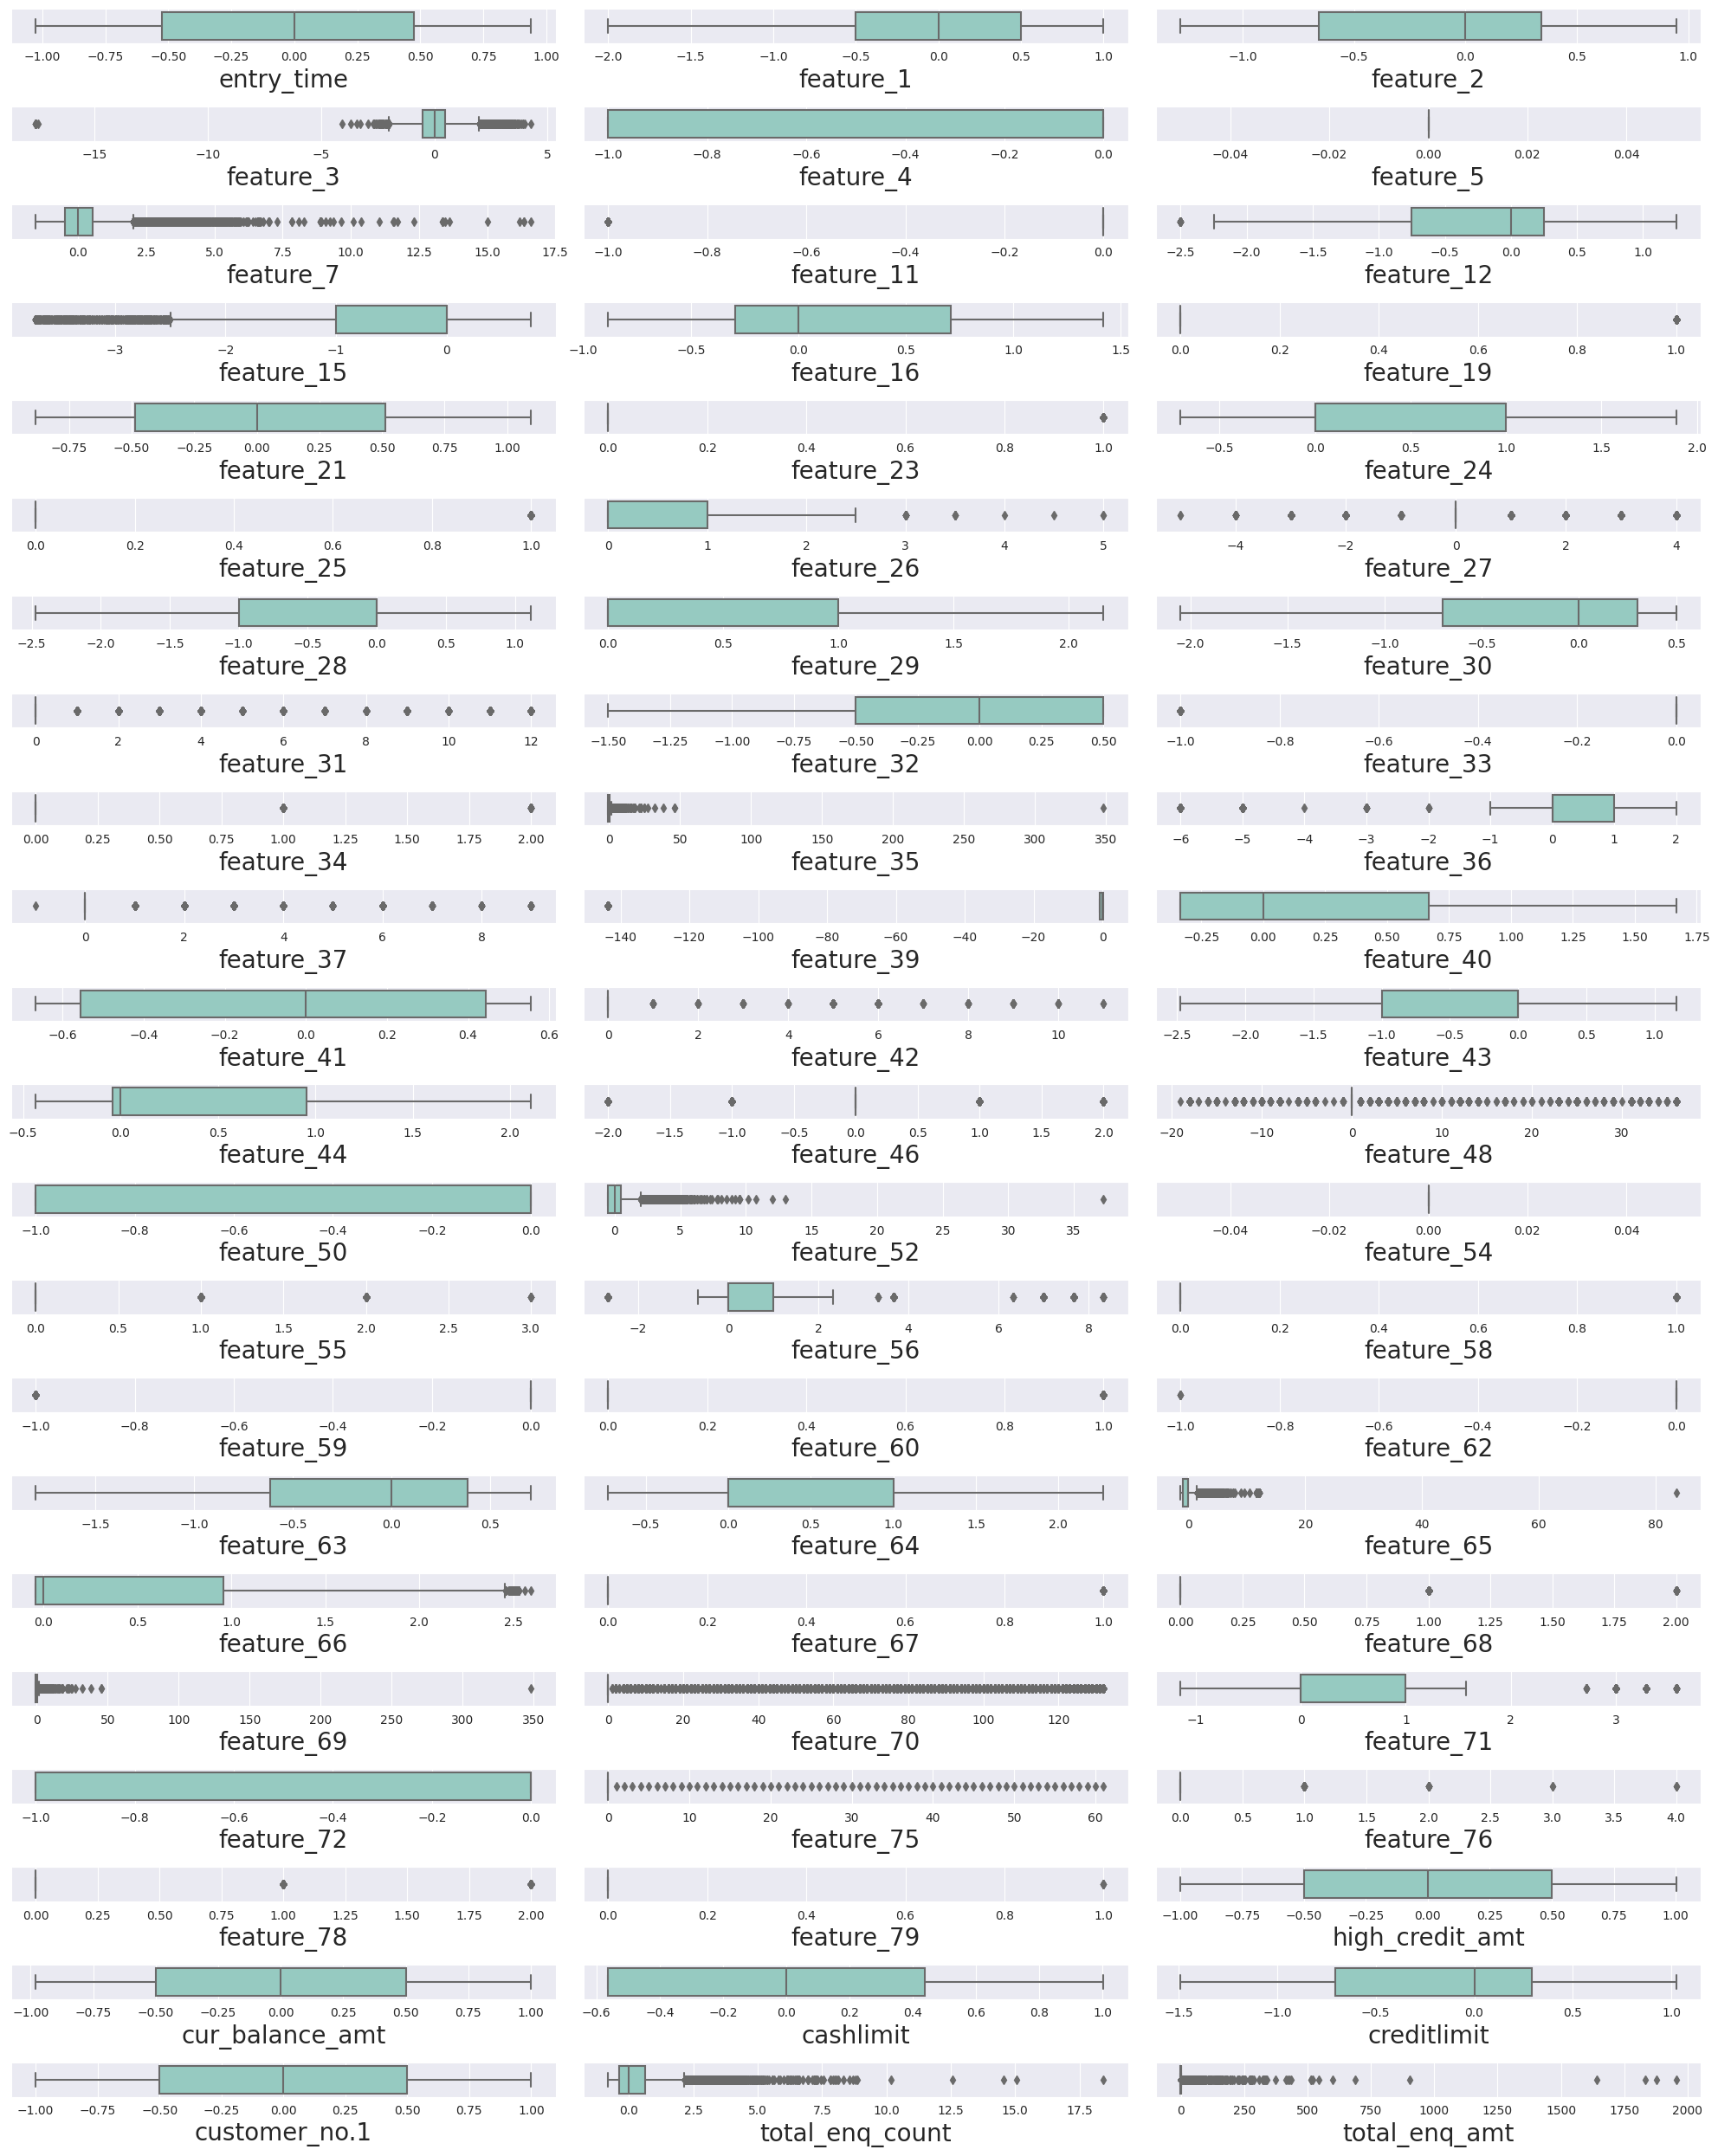

In [61]:
plt.figure(figsize=(20,25)) # defining canvas size
plotnum = 1 # counter

for column in data_2: # iteration of columns / acessing the columns from  dataset
    if plotnum<=70:    # a maximum of 70 box plots are generated to avoid overcrowding the visualization
        plt.subplot(22,3,plotnum) # # plotting  graphs (22-rows,3-columns) and plotnumber is for count
        sns.boxplot(x = data[column]) # Plotting box plots
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotnum+=1 # counter increment
plt.tight_layout() # the subplots are neatly arranged within the canvas.
plt.show() # displays the entire set of subplots as a visualization.

#### The code effectively generates a grid of box plots, each showing the distribution of the scaled numerical features. This visualization allows you to observe the impact of scaling on the distribution of the features while considering the presence of outliers.

In [62]:
data.head()

Unnamed: 0 dt_opened  customer_no  entry_time  feature_1  feature_2  \
0           0   18Apr15            1   -0.253333       -1.5  -0.420635   
1           1   21Apr15            2    0.293333       -1.5   0.198413   
2           2   22Apr15            3    0.293333       -1.5   0.198413   
3           3   25Apr15            4   -0.106667       -1.5   0.126984   
4           4   06May15            5    0.853333       -1.5   0.111111   

   feature_3  feature_4  feature_5  feature_7  feature_11  feature_12  \
0  -1.731707       -0.5        0.0   5.910448         0.0       -1.75   
1   0.951220       -1.0        0.0  16.358209         0.0       -1.75   
2   1.292683       -1.0        0.0   8.895522         0.0       -1.75   
3   1.195122       -1.0        0.0   5.910448         0.0       -1.75   
4   0.000000        0.0        0.0   5.910448         0.0       -1.75   

   feature_15  feature_16  feature_19  feature_20  feature_21  feature_22  \
0   -3.407407   -0.703540         0.0  ADFPNXXXXX   -0.663823  98332XXXXX   
1   -2.666667   -0.238938         0.0  AJWPRXXXXX    0.044411  99455XXXXX   
2   -2.666667   -0.238938         1.0  AFAPNXXXXX   -0.257114  98456XXXXX   
3   -3.432099   -0.637168         0.0  AAAPDXXXXX    0.161748  98220XXXXX   
4   -3.691358   -0.075221         0.0  ABEPSXXXXX   -0.704260  98111XXXXX   

   feature_23  feature_24  feature_25  feature_26  feature_27  feature_28  \
0         0.0    1.000000         0.0         1.0         0.0   -0.176471   
1         0.0    0.000000         0.0         1.0         0.0   -1.941176   
2         0.0    1.138686         0.0         0.0         0.0   -1.941176   
3         0.0    1.467153         0.0         1.5         0.0    0.176471   
4         0.0    1.000000         0.0         1.5         0.0   -1.117647   

   feature_29  feature_30  feature_31  feature_32  feature_33  feature_34  \
0    1.037739       -2.00         0.0         0.5         0.0         1.0   
1    1.607238       -1.80         0.0         0.5         0.0         1.0   
2    1.607238       -1.95         0.0         0.5         0.0         1.0   
3    1.074856       -0.85         0.0         0.5         0.0         1.0   
4    0.042561       -0.50         0.0         0.5         0.0         1.0   

   feature_35  feature_36  feature_37  feature_39  feature_40  feature_41  \
0    1.395381         0.0         0.0 -143.571429   -0.333333   -0.666667   
1   -0.697667         0.0         0.0 -143.571429   -0.333333   -0.666667   
2   -0.697667         0.0         0.0 -143.571429   -0.333333   -0.666667   
3    1.627945         0.0         0.0 -143.571429   -0.333333   -0.666667   
4    6.279216         0.0         0.0 -143.571429   -0.333333   -0.666667   

   feature_42  feature_43  feature_44  feature_46  feature_47  feature_48  \
0         0.0   -0.210526    0.993213         0.0  ADFPNXXXXX        31.0   
1         0.0   -2.157895    1.564667         0.0  AJWPRXXXXX        31.0   
2         0.0   -2.157895    1.564667         0.0  AFAPNXXXXX         0.0   
3         0.0    0.210526    1.032387         0.0  AAAPDXXXXX        31.0   
4         0.0   -1.000000    0.000029         0.0  ABEPSXXXXX        31.0   

   feature_50  feature_52  feature_54  feature_55  feature_56  feature_58  \
0         0.0        -0.5         0.0         0.0    3.666667         1.0   
1        -1.0        -0.5         0.0         0.0    2.333333         1.0   
2        -1.0        -0.5         0.0         2.0    2.333333         0.0   
3         0.0        -0.5         0.0         0.0    3.666667         1.0   
4        -1.0        -0.5         0.0         0.0    1.000000         1.0   

   feature_59  feature_60  feature_62  feature_63  feature_64  feature_65  \
0         0.0         0.0         0.0   -1.797695    1.000000   -1.203390   
1         0.0         0.0         0.0   -1.736236    0.636364   -1.228814   
2         0.0         0.0         0.0   -1.782330    0.636364   -1.228814   
3         0.0         0.0        

# FEATURE SELECTION :-

### DROP UNIQUE AND CONSTANT FEATURES :-

In [63]:
data.drop(['Unnamed: 0','dt_opened','entry_time','feature_5','feature_20','feature_22','feature_47','feature_54','feature_77','customer_no.1',],axis=1,inplace=True)

* In this dataset unique column available('feature_5','feature_20','feature_22','feature_   47','feature_54','feature_77') so drop this column
* Remove unwanted columns like ids,date,time.

### CHANGING DATA TYPE BEFORE TO GET CORRELATION

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 64 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_no      23896 non-null  int64  
 1   feature_1        23896 non-null  float64
 2   feature_2        23896 non-null  float64
 3   feature_3        23896 non-null  float64
 4   feature_4        23896 non-null  float64
 5   feature_7        23896 non-null  float64
 6   feature_11       23896 non-null  float64
 7   feature_12       23896 non-null  float64
 8   feature_15       23896 non-null  float64
 9   feature_16       23896 non-null  float64
 10  feature_19       23896 non-null  float64
 11  feature_21       23896 non-null  float64
 12  feature_23       23896 non-null  float64
 13  feature_24       23896 non-null  float64
 14  feature_25       23896 non-null  float64
 15  feature_26       23896 non-null  float64
 16  feature_27       23896 non-null  float64
 17  feature_28  

In [65]:
# First convert the data-type of all feature because all feature data-type is object
data = data.astype('int64')

#### The purpose of converting columns to the int64 data type is to ensure that all values in these columns are treated as integers. This can be useful when we perform integer-based operations or if we want to ensure consistency in the data types across all columns.

In [66]:
# Get data type of all feature
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 64 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   customer_no      23896 non-null  int64
 1   feature_1        23896 non-null  int64
 2   feature_2        23896 non-null  int64
 3   feature_3        23896 non-null  int64
 4   feature_4        23896 non-null  int64
 5   feature_7        23896 non-null  int64
 6   feature_11       23896 non-null  int64
 7   feature_12       23896 non-null  int64
 8   feature_15       23896 non-null  int64
 9   feature_16       23896 non-null  int64
 10  feature_19       23896 non-null  int64
 11  feature_21       23896 non-null  int64
 12  feature_23       23896 non-null  int64
 13  feature_24       23896 non-null  int64
 14  feature_25       23896 non-null  int64
 15  feature_26       23896 non-null  int64
 16  feature_27       23896 non-null  int64
 17  feature_28       23896 non-null  int64
 18  featur

## CHECKING CORRELATION :-

### Heatmap :-

* The heatmap is a powerful visualization tool for quickly identifying relationships between features in a dataset. It helps in understanding which features are strongly correlated, which can be important for feature selection, dimensionality reduction, and building predictive models.

In [67]:
data.corr()

customer_no  feature_1  feature_2  feature_3  feature_4  \
customer_no         1.000000  -0.687950  -0.030750   0.025652  -0.175635   
feature_1          -0.687950   1.000000   0.013400  -0.016073   0.101195   
feature_2          -0.030750   0.013400   1.000000   0.003436   0.041077   
feature_3           0.025652  -0.016073   0.003436   1.000000  -0.169464   
feature_4          -0.175635   0.101195   0.041077  -0.169464   1.000000   
feature_7          -0.047912  -0.061750   0.004814   0.120866  -0.044950   
feature_11         -0.032704   0.035019   0.005011   0.001046  -0.010041   
feature_12         -0.691496   0.976392   0.013861  -0.018949   0.118452   
feature_15          0.172494  -0.061104  -0.009270   0.007058   0.141353   
feature_16         -0.138198   0.110598   0.019768  -0.038518  -0.133706   
feature_19         -0.003687   0.011730  -0.000410   0.026269  -0.023271   
feature_21          0.006364  -0.005049   0.013992   0.015127  -0.010188   
feature_23         -0.096792   0.043104  -0.004053   0.036891   0.067128   
feature_24         -0.055469   0.025059   0.001759   0.020768   0.049826   
feature_25          0.035894  -0.002103   0.000675  -0.073401   0.040779   
feature_26         -0.262112   0.136285   0.012796   0.025028   0.162904   
feature_27          0.018561  -0.001454   0.006490   0.008032   0.094624   
feature_28          0.080327  -0.054785  -0.005906   0.013610   0.060293   
feature_29         -0.253892   0.145646   0.022110  -0.020931  -0.140835   
feature_30          0.007046   0.017903   0.004120  -0.044549   0.043111   
feature_31          0.199726  -0.065861  -0.047665  -0.000420  -0.224461   
feature_32          0.023333  -0.009404  -0.004301  -0.004857  -0.028924   
feature_33         -0.043709   0.017389  -0.009715   0.047295  -0.109686   
feature_34         -0.008931  -0.079464  -0.011225   0.074929  -0.119760   
feature_35         -0.017408  -0.017105   0.002801   0.047275  -0.013613   
feature_36          0.028949  -0.021310   0.006327  -0.014152  -0.054670   
feature_37          0.149054  -0.052245  -0.005020  -0.019971  -0.063118   
feature_39          0.009169   0.079884   0.010470  -0.073775   0.120331   
feature_40          0.018312   0.016528  -0.008568  -0.028425  -0.010479   
feature_41               NaN        NaN        NaN        NaN        NaN   
feature_42          0.018286   0.004346   0.005670  -0.026674   0.026968   
feature_43         -0.005007  -0.003012   0.011278   0.017119  -0.083140   
feature_44         -0.243148   0.154418   0.017903  -0.045406  -0.085898   
feature_46          0.006816  -0.012392   0.010858  -0.001458  -0.001090   
feature_48         -0.023919  -0.026377   0.017712   0.020992  -0.004899   
feature_50         -0.107861   0.057292  -0.003333  -0.044692   0.019285   
feature_52         -0.037238  -0.004067   0.001851   0.064932  -0.008763   
feature_55         -0.007239   0.007733  -0.000582   0.026493  -0.025615   
feature_56          0.026292  -0.047830  -0.000241   0.031637   0.028402   
feature_58         -0.054949  -0.048343   0.015964   0.021780  -0.065488   
feature_59         -0.032704   0.035019   0.005011   0.001046  -0.010041   
feature_60         -0.031695  -0.040985   0.010302   0.003274  -0.055577   
feature_62         -0.001077   0.001372   0.003976  -0.003485  -0.002849   
feature_63          0.004643   0.013201   0.001452  -0.040000   0.041460   
feature_64          0.015241  -0.029001   0.011611   0.005090   0.025897   
feature_65          0.056863  -0.024038   0.007608  -0.021343   0.083472   
feature_66         -0.137888   0.101626   0.010734  -0.058106  -0.004594   
feature_67          0.043709  -0.017389   0.009715  -0.047295   0.109686   
feature_68         -0.008931  -0.079464  -0.011225   0.074929  -0.119760   
feature_69         -0.017408  -0.017105   0.002801   0.047275  -0.013613   
feature_70         -0.006656  -0.079822  -0.012522   0.077757  -0.113758   
feature_71          0.057736  -0.055879  -0.002466   0.016680   0

#### Each cell in the correlation matrix represents the correlation coefficient between two columns in the DataFrame. A high positive correlation (close to 1) suggests a strong positive linear relationship, while a high negative correlation (close to -1) suggests a strong negative linear relationship. A correlation close to 0 indicates little to no linear relationship.
#### The correlation matrix is useful for understanding how different features in the dataset are related to each other. It's often used in data analysis to identify patterns, multicollinearity (where two or more variables are highly correlated), and to make informed decisions about feature selection or model building in machine learning.

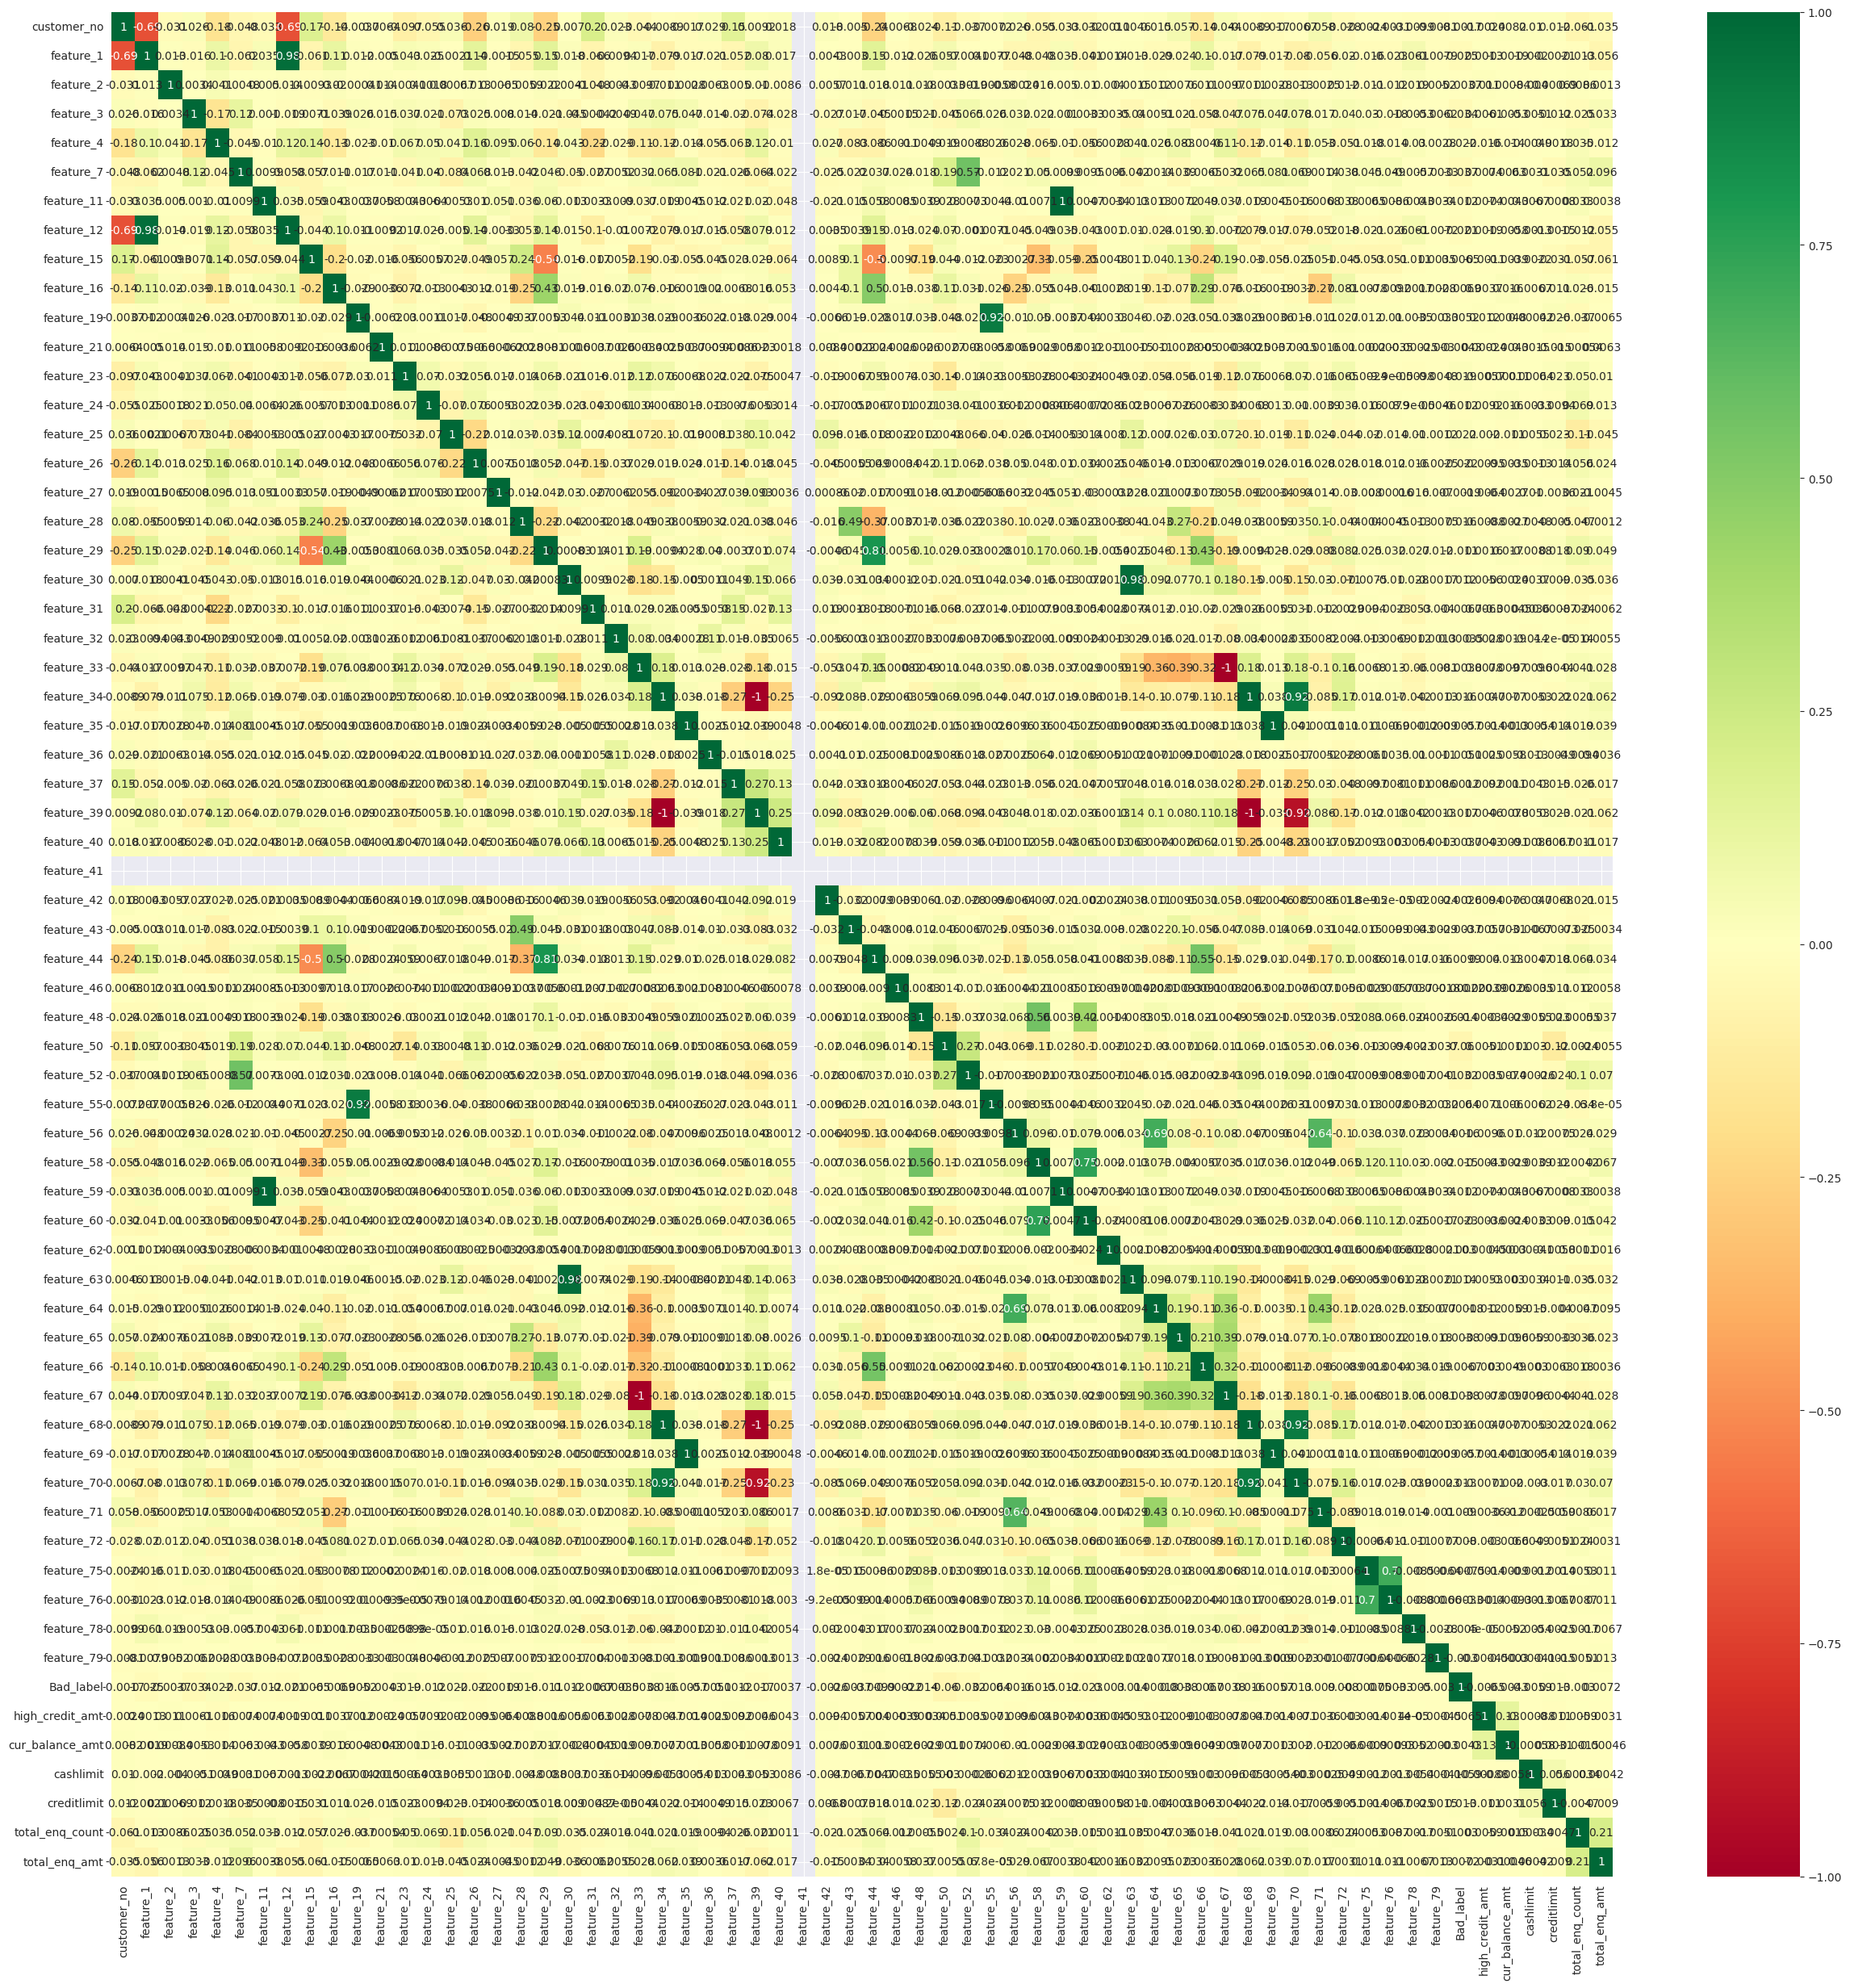

In [68]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')
plt.show()

* From above heatmap scale we are clearly see that this is very difficult to find highly correalted feature in data.

* So we confirm with the help of simple python code to check the highly correlated features


#### annot=True: It specifies that the values of the correlation coefficients should be annotated (displayed) within each cell of the heatmap.
#### cmap='RdYlGn': This sets the color map for the heatmap. The 'RdYlGn' color map ranges from red (negative correlations) to yellow (no correlation) to green (positive correlations), helping to visually represent the strength and direction of correlations.


In [69]:
 #To get highly corelated features
pd.set_option('display.max_rows',None)
corrmat = data.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

feature1    feature2      corr
0   feature_39  feature_68  0.995830
1   feature_68  feature_39  0.995830
2   feature_34  feature_39  0.995830
3   feature_39  feature_34  0.995830
4   feature_12   feature_1  0.976392
5    feature_1  feature_12  0.976392
6   feature_63  feature_30  0.975522
7   feature_30  feature_63  0.975522
8   feature_39  feature_70  0.923731
9   feature_70  feature_39  0.923731
10  feature_70  feature_34  0.919709
11  feature_34  feature_70  0.919709
12  feature_70  feature_68  0.919709
13  feature_68  feature_70  0.919709
14  feature_55  feature_19  0.918357
15  feature_19  feature_55  0.918357

* Here we are going to drop highly correlated features.

#### pd.set_option('display.max_rows', None): This line sets the display option to show all rows in the output, ensuring that all highly correlated pairs are visible.
#### corrmat = data.corr(): This code calculates the correlation matrix for all columns in the DataFrame data.
#### corrmat = corrmat.abs().unstack(): This line takes the absolute values of the correlation matrix and unstacks it. Unstacking transforms the correlation matrix into a series with pairs of features as indices.
#### corrmat = corrmat.sort_values(ascending=False): The code sorts the correlation values in descending order, which means that highly correlated pairs will appear at the top of the series.
#### corrmat = corrmat[corrmat >= 0.9]: This line filters the correlation values to only keep those that are greater than or equal to 0.9. In other words, it selects highly correlated pairs with a correlation coefficient of at least 0.9.
#### corrmat = corrmat[corrmat < 1]: Here, it further filters the correlation values to exclude pairs with a correlation coefficient of 1. A correlation of 1 indicates a perfect linear relationship, and we want to exclude such cases.
#### corrmat = pd.DataFrame(corrmat).reset_index(): This code converts the filtered correlation series back into a DataFrame and resets the index, so the pairs of features become columns.
#### corrmat.columns = ['feature1', 'feature2', 'corr']: It assigns meaningful column names to the DataFrame, with 'feature1' and 'feature2' representing the names of the correlated features and 'corr' representing the correlation coefficient between them.
#### corrmat: Finally, the DataFrame corrmat is displayed, showing highly correlated pairs of features along with their correlation coefficients.
#### This analysis is useful for identifying and potentially addressing multicollinearity issues when working with machine learning models, as highly correlated features can impact the model's performance.

In [70]:
data.drop(['feature_63','feature_39','feature_44','feature_1','feature_70','feature_55'],axis=1,inplace=True)

#### This line of code is used to drop (remove) columns from the DataFrame 'data'.

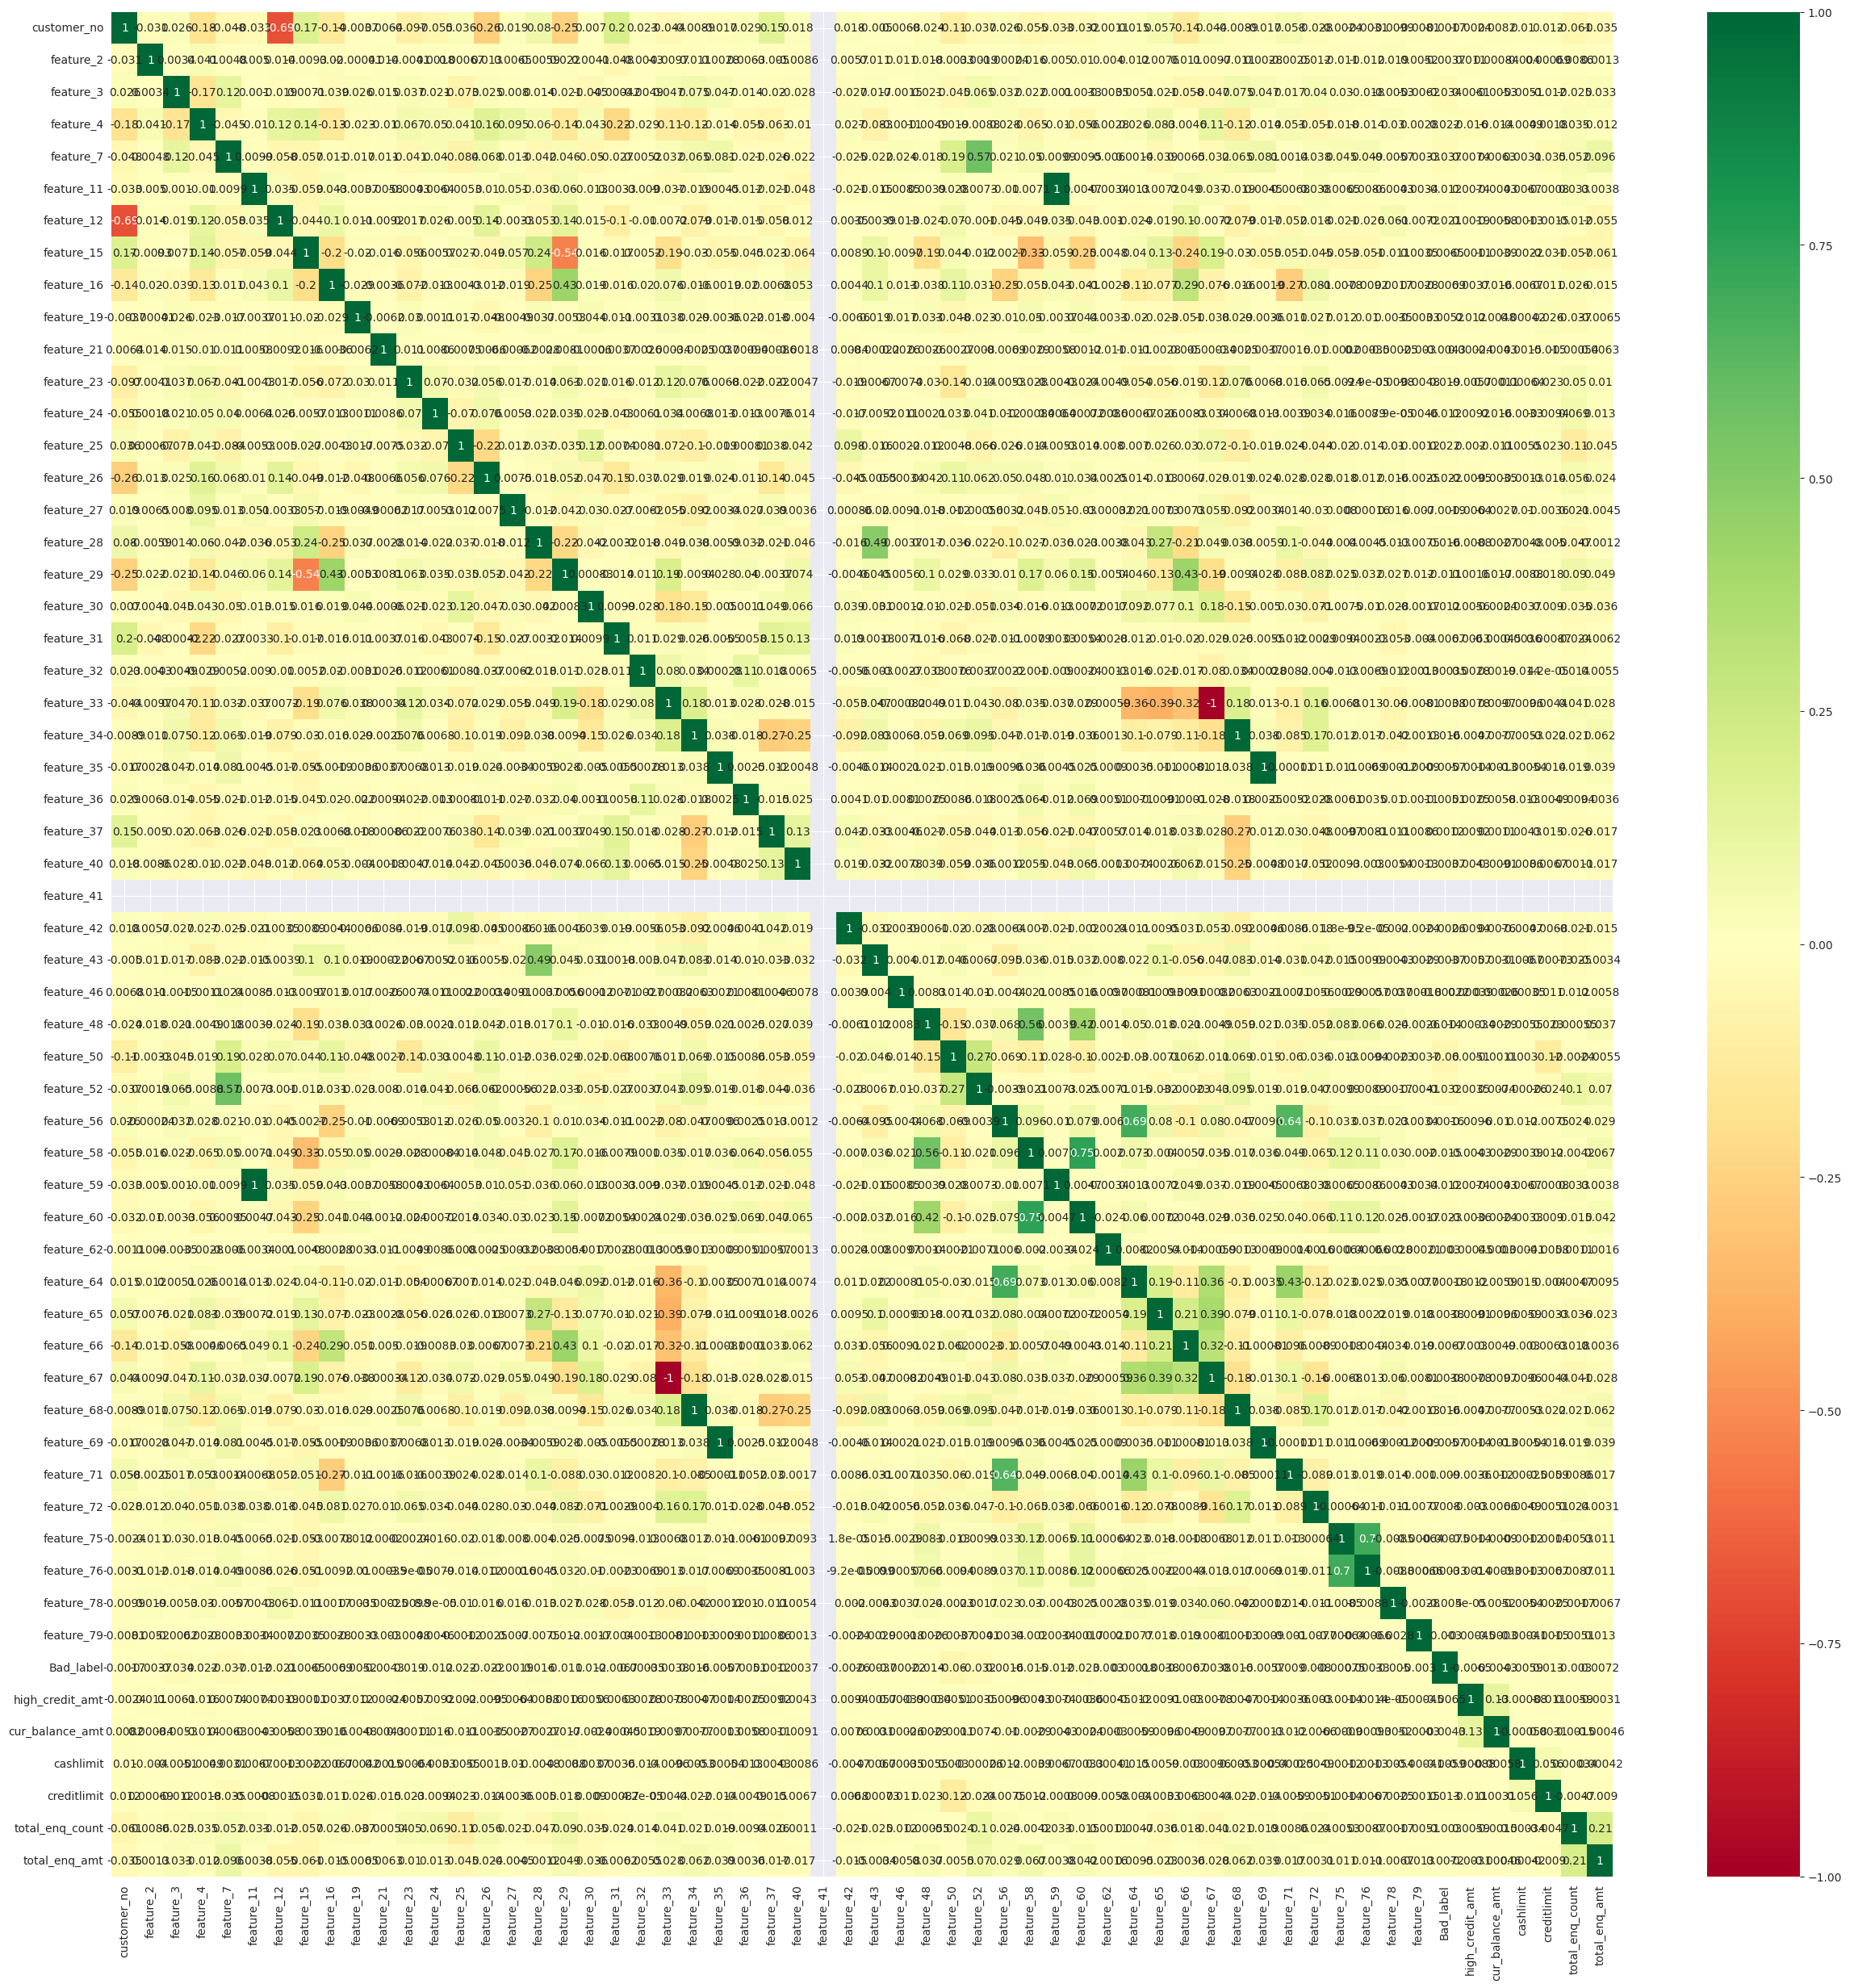

In [71]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')
plt.show()

* From above heatmap scale we are clearly see that their is no highly correlated feature in data

* But we confirm with the help of a simple code below

In [72]:
 #To get highly corelated feature
pd.set_option('display.max_rows',None)
corrmat = data.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

Empty DataFrame
Columns: [feature1, feature2, corr]
Index: []

* Now we can confirm that there is no highly correlated features present.

### Checking Duplicates :-

In [73]:
data.duplicated().sum()

0

* There are no Duplicates present in data.


#### The above code gives us the count of duplicated rows in the data DataFrame. Duplicated rows are rows that have identical values across all columns, indicating that there are duplicate records in the dataset.

# MODEL CREATION :-

## DEFINE INDEPENDENT AND DEPENDENT VARIABLE :-

In [74]:
data_final = data.loc[:,['customer_no', 'feature_2', 'feature_3', 'feature_4', 'feature_7',
       'feature_11', 'feature_12', 'feature_15', 'feature_16', 'feature_19',
       'feature_21','feature_23', 'feature_24', 'feature_25',
       'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30',
       'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35',
       'feature_36', 'feature_37', 'feature_40', 'feature_41', 'feature_42',
       'feature_43', 'feature_46', 'feature_48', 'feature_50', 'feature_52',
       'feature_56', 'feature_58', 'feature_59', 'feature_60', 'feature_62',
       'feature_64', 'feature_65', 'feature_66', 'feature_67', 'feature_68',
       'feature_69', 'feature_71', 'feature_72', 'feature_75', 'feature_76',
       'feature_78', 'feature_79', 'high_credit_amt',
       'cur_balance_amt', 'cashlimit', 'creditlimit', 'total_enq_count',
       'total_enq_amt','Bad_label']]

#### The provided code is used to create a new DataFrame named data_final by selecting specific columns from the original DataFrame 'data'The purpose of creating data_final is likely for further analysis or modeling, where these selected columns are relevant for the analysis or prediction task..

In [75]:
data_final.head()

customer_no  feature_2  feature_3  feature_4  feature_7  feature_11  \
0            1          0         -1          0          5           0   
1            2          0          0         -1         16           0   
2            3          0          1         -1          8           0   
3            4          0          1         -1          5           0   
4            5          0          0          0          5           0   

   feature_12  feature_15  feature_16  feature_19  feature_21  feature_23  \
0          -1          -3           0           0           0           0   
1          -1          -2           0           0           0           0   
2          -1          -2           0           1           0           0   
3          -1          -3           0           0           0           0   
4          -1          -3           0           0           0           0   

   feature_24  feature_25  feature_26  feature_27  feature_28  feature_29  \
0           1           0           1           0           0           1   
1           0           0           1           0          -1           1   
2           1           0           0           0          -1           1   
3           1           0           1           0           0           1   
4           1           0           1           0          -1           0   

   feature_30  feature_31  feature_32  feature_33  feature_34  feature_35  \
0          -2           0           0           0           1           1   
1          -1           0           0           0           1           0   
2          -1           0           0           0           1           0   
3           0           0           0           0           1           1   
4           0           0           0           0           1           6   

   feature_36  feature_37  feature_40  feature_41  feature_42  feature_43  \
0           0           0           0           0           0           0   
1           0           0           0           0           0          -2   
2           0           0           0           0           0          -2   
3           0           0           0           0           0           0   
4           0           0           0           0           0          -1   

   feature_46  feature_48  feature_50  feature_52  feature_56  feature_58  \
0           0          31           0           0           3           1   
1           0          31          -1           0           2           1   
2           0           0          -1           0           2           0   
3           0          31           0           0           3           1   
4           0          31          -1           0           1           1   

   feature_59  feature_60  feature_62  feature_64  feature_65  feature_66  \
0           0           0           0           1          -1           0   
1           0           0           0           0          -1           1   
2           0           0           0           0          -1           1   
3           0           0           0           1          -1           0   
4           0           0           0           0          -1           0   

   feature_67  feature_68  feature_69  feature_71  feature_72  feature_75  \
0           0           1           1           1           0           0   
1           0           1           0           1           0           0   
2           0           1           0           1           0           0   
3           0           1           1           1           0          50   
4           0           1           6           0           0           0   

   feature_76  feature_78  feature_79  high_credit_amt  cur_balance_amt  \
0           0           0           0                0                0   
1           0           0           0                0                0   
2           0           0           0                0                0   
3           1    

In [76]:
X = data_final.iloc[:,:-1]
y = data_final.Bad_label

#### X = data_final.iloc[:, :-1]: This line creates a DataFrame X by selecting all rows and all columns of data_final except for the last column. In machine learning, X typically represents the input features or independent variables used to make predictions.
#### y = data_final.Bad_label: This line creates a Series y by selecting the column named 'Bad_label' from the data_final DataFrame. In machine learning, y typically represents the target variable or dependent variable that we want to predict. In this case, it seems to represent a binary label, such as "bad" or "good" credit status.
#### So, after running this code, we have:
#### X: A DataFrame containing all the input features.
#### y: A Series containing the target labels.
#### These can be used to train machine learning models where we use the features in X to predict the labels in y.

In [77]:
y.value_counts()

0    22892
1     1004
Name: Bad_label, dtype: int64

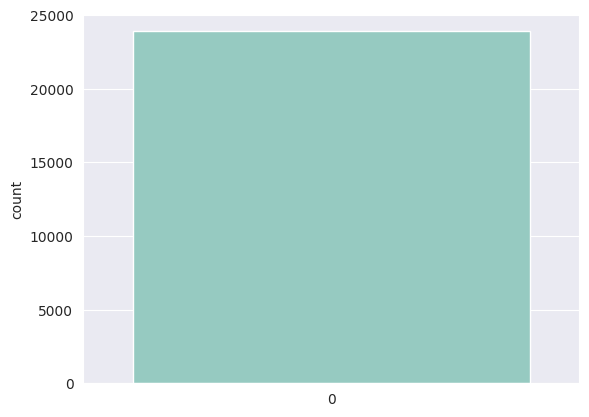

In [78]:
#Plotting the graph
sns.countplot(y)
plt.show()

## BALANCING THE TARGET COLUMN USING SMOTE :-

In [79]:
y.value_counts(normalize=True)*100

0    95.79846
1     4.20154
Name: Bad_label, dtype: float64

#### It is used to calculate the percentage distribution of unique values in the Series 'y'

In [80]:
pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


#### "imbalanced-learn" is a library commonly used for dealing with imbalanced datasets in machine learning, where one class of data significantly outnumbers the other(s). This library provides tools and techniques to address this issue and improve model performance.
#### -U or --upgrade: This option tells pip to upgrade the specified package to the latest version if it's already installed. If the package is not installed, it will be installed as usual.

In [81]:
from collections import Counter
from imblearn.over_sampling import SMOTE #SMOTE(synthetic minority oversampling techinque)
sm = SMOTE() # object creation
print("unbalanced data   :  ",Counter(y))
X_sm,y_sm = sm.fit_resample(X,y)
print("balanced data:    :",Counter(y_sm))

unbalanced data   :   Counter({0: 22892, 1: 1004})
balanced data:    : Counter({0: 22892, 1: 22892})


#### from collections import Counter: This line imports the Counter class from the Python collections module. Counter is used to count the occurrences of elements in a list or iterable.
#### from imblearn.over_sampling import SMOTE: This line imports the SMOTE (Synthetic Minority Over-sampling Technique) class from the "imbalanced-learn" library. SMOTE is a technique used to oversample the minority class in an imbalanced dataset by generating synthetic samples.

#### sm = SMOTE(): This line creates an instance of the SMOTE class, which will be used to perform the oversampling.

##### print("unbalanced data : ", Counter(y)): This line prints the count of each unique value in the y Series, which represents the original unbalanced data. It's useful to see how many instances are in each class before oversampling.

#### X_sm, y_sm = sm.fit_resample(X, y): This line applies the SMOTE technique to the input features X and target labels y. It oversamples the minority class to balance the dataset. The oversampled data is stored in X_sm (features) and y_sm (labels).

#### print("balanced data: :", Counter(y_sm)): This line prints the count of each unique value in the y_sm Series, which represents the balanced (oversampled) data. It's useful to confirm that the dataset is now balanced after applying SMOTE.

#### In summary, this code uses SMOTE to address class imbalance in a dataset by generating synthetic samples for the minority class, thus balancing the dataset. The Counter class is used to count the occurrences of class labels before and after oversampling for evaluation purposes.

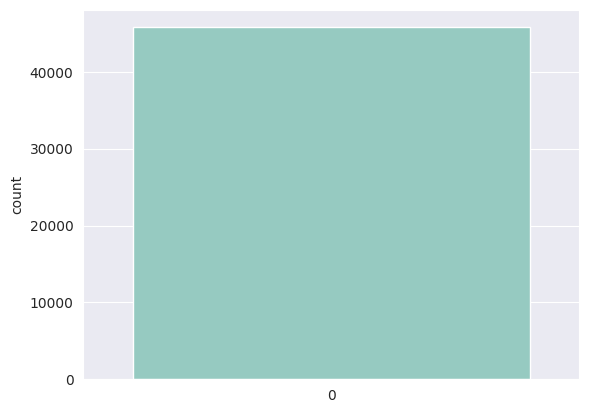

In [82]:
#Plotting the graph
sns.countplot(y_sm)
plt.show()

# SPLIT TRAINING AND TESTING DATA :-

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,random_state=10,test_size=.2)

#### X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, random_state=10, test_size=0.2): This line splits the data into training and testing sets.

#### X_sm: This is the input feature dataset that has been oversampled using SMOTE.

#### y_sm: This is the target label dataset that corresponds to the oversampled data.

#### random_state=10: This parameter is set to ensure reproducibility. It means that the random splitting process will be the same every time you run the code with this seed value.

#### test_size=0.2: This parameter specifies the size of the testing set as a fraction of the total dataset. In this case, it's set to 0.2, which means 20% of the data will be used for testing, and the remaining 80% will be used for training.

#### X_train: This variable will contain the training set of input features.

#### X_test: This variable will contain the testing set of input features.

#### y_train: This variable will contain the training set of target labels.

#### y_test: This variable will contain the testing set of target labels.

#### In summary, this code splits the oversampled dataset (X_sm and y_sm) into a training set (X_train and y_train) and a testing set (X_test and y_test) with a specified random seed and a specified test size ratio. This is a common step in machine learning to evaluate the performance of models on unseen data.

In [84]:
# Check shape of train and test
X_train.shape

(36627, 57)

#### It means there are 36627 samples (rows) in the training set, and each sample has 57 features (columns).

In [85]:
X_test.shape

(9157, 57)

#### It means there are 9157 samples (rows) in the testing set, and each sample has 57 features (columns).

In [86]:
y_train.shape

(36627,)

#### It means there are 36627 target labels in the training set.

In [87]:
y_test.shape

(9157,)

#### It means there are 9157 target labels in the testing set.

# 1. Logistic Regression :-

In [88]:
# Step:1 importing library
from sklearn.linear_model import LogisticRegression

# Step:2 Object creation
log_model = LogisticRegression()

# Step:3 Fitting the training data
log_model.fit(X_train,y_train)

# Step:4 Prediction on test data
log_test_predict = log_model.predict(X_test)

# Step:5 Prediction on training data
log_train_predict = log_model.predict(X_train)

#### log_model.fit(X_train, y_train): This line trains the logistic regression model using the training data
#### log_test_predict = log_model.predict(X_test): This line uses the trained logistic regression model to make predictions on the testing set (X_test) of input features. The predicted labels are stored in the log_test_predict variable.

#### log_train_predict = log_model.predict(X_train): This line uses the same trained logistic regression model to make predictions on the training set (X_train) of input features. The predicted labels are stored in the log_train_predict variable.

#### In summary, this code sets up a logistic regression classifier, trains it on the training data, and then uses it to make predictions on both the training and testing data. This is a common workflow in supervised machine learning for classification tasks.

## EVALUATION :-

### TRAINING ACCURACY :-

In [89]:
# importing library
from sklearn.metrics import accuracy_score,recall_score,f1_score,classification_report,accuracy_score,roc_auc_score
log_train_accuracy = accuracy_score(log_train_predict,y_train)
print("Training accuracy of Logistic regression model",log_train_accuracy*100)
print("Logistic regression training Classification report: \n",classification_report(log_train_predict,y_train))

Training accuracy of Logistic regression model 74.2539656537527
Logistic regression training Classification report: 
               precision    recall  f1-score   support

           0       0.79      0.72      0.75     20194
           1       0.69      0.77      0.73     16433

    accuracy                           0.74     36627
   macro avg       0.74      0.75      0.74     36627
weighted avg       0.75      0.74      0.74     36627



### TESTING ACCURACY :-

In [90]:
log_test_accuracy = accuracy_score(log_test_predict,y_test)
print("Testing accuracy of Logistic regession model",log_test_accuracy*100)
print("Logistic regression testing Classification report: \n",classification_report(log_test_predict,y_test))

Testing accuracy of Logistic regession model 73.13530632303156
Logistic regression testing Classification report: 
               precision    recall  f1-score   support

           0       0.78      0.71      0.75      5092
           1       0.68      0.76      0.71      4065

    accuracy                           0.73      9157
   macro avg       0.73      0.73      0.73      9157
weighted avg       0.74      0.73      0.73      9157



* Logisticregression classifier  model works well on training and testing side.

## USE BAGGING ON LOGISTIC REGRESSION MODEL:-

In [91]:
# Step:1 Create logistic regression object
log_reg1 = LogisticRegression()

# Step:2 importing library and creating bagging object
from sklearn.ensemble import BaggingClassifier
bagg = BaggingClassifier(base_estimator=log_reg1,n_estimators=45)
#base_estimator---> algorithm which you want to pass
#n_estimotors-----> number of base learners

# Step:3 Fitting the training data
bagg.fit(X_train,y_train)

# Step:4 Prediction on test data
bagg_predict = bagg.predict(X_test)

#### The code we have provided will create a bagging classifier model using logistic regression as the base estimator. The number of base learners is set to 45. The model will be fitted on the training data and the predictions will be made on the test data.

#### The output of the code will be the predictions of the bagging classifier model on the test data. You can use these predictions to evaluate the performance of the model.

In [92]:
bagg_recall = accuracy_score(bagg_predict,y_test)
print("Racall score after bagging",bagg_recall)

Racall score after bagging 0.7647701212187398


* After applying bagging score slightly improves.

# 2.K-Nearest Neighbours Classifier (KNN) :-

In [93]:
# Step:1 Taking the optimal value of k
from sklearn.neighbors import KNeighborsClassifier
error_rate = [] # Creating empty list
for i in range(2,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_knn_predict = knn.predict(X_test)
    error_rate.append(np.mean(y_knn_predict != y_test))
print("Error rate:",error_rate)

Error rate: [0.17953478213388666, 0.24069018237414, 0.2226711805176368, 0.2599104510210768, 0.24462160096101343, 0.2691929671289724, 0.2592552145899312, 0.2815332532488806, 0.2708310582068363]


#### The code we have provided will calculate the error rate of the KNeighborsClassifier model for different values of k. The error rate is the percentage of test data points that are misclassified by the model.
#### The lowest error rate is 0.17, which occurs when k=2. This means that the KNeighborsClassifier model with k=2 misclassifies only 17% of the test data points.

#### The optimal value of k will depend on the specific dataset. It is a good idea to experiment with different values of k to find the one that gives the best results on the test data.

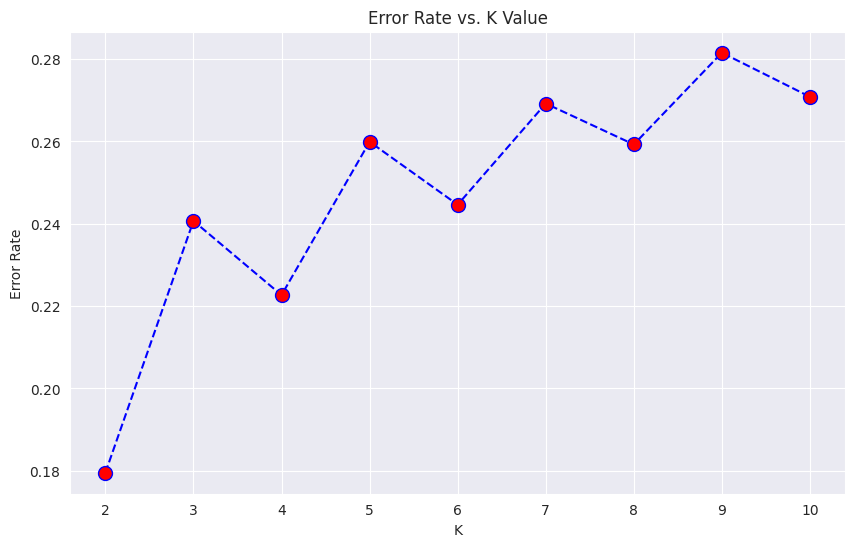

In [94]:
# Step:2 Plotting the error rate
plt.figure(figsize=(10,6))
plt.plot(range(2,11),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [95]:
# Step:3 Get nearst neighbors
knn1 = KNeighborsClassifier(n_neighbors=4)

# Step:4 Fitting the training data
knn1.fit(X_train,y_train)

# Step:5 Prediction on testing data
knn_test_predict = knn1.predict(X_test)

# Step:6 Prediction on training data
knn_train_predict = knn1.predict(X_train)

## EVALUATION :-

### TRAINING ACCURACY :-

In [97]:
knn_train_accuracy = accuracy_score(y_train,knn_train_predict)
print("Training accuracy of knn model ",knn_train_accuracy*100)
print("Training classification report:\n",classification_report(knn_train_predict,y_train))

Training accuracy of knn model  87.55835858792695
Training classification report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87     16519
           1       0.92      0.84      0.88     20108

    accuracy                           0.88     36627
   macro avg       0.88      0.88      0.88     36627
weighted avg       0.88      0.88      0.88     36627



* KNN classifier model slightly performs well accuracy on training data.

### TESTING ACCURACY :-

In [98]:
knn_test_accuracy = accuracy_score(y_test,knn_test_predict)
print("Testing accuracy of knn model",knn_test_accuracy*100)
print("Testing classification report: \n",classification_report(y_test,knn_test_predict))

Testing accuracy of knn model 77.73288194823633
Testing classification report: 
               precision    recall  f1-score   support

           0       0.84      0.68      0.76      4618
           1       0.73      0.87      0.80      4539

    accuracy                           0.78      9157
   macro avg       0.79      0.78      0.78      9157
weighted avg       0.79      0.78      0.78      9157



* But testing accuracy is still lagging so we apply bagging


## USE BAGGING ON KNEIGHBOURS CLASSIFIER :-

In [99]:
# step:1 Create a K-neighbour classifier object
knn1 = KNeighborsClassifier(n_neighbors=3)

# Step:2 importing library and creating bagging object
from sklearn.ensemble import BaggingClassifier
bagg = BaggingClassifier(base_estimator=knn1,n_estimators=50)
#base_estimator---> algorithm which you want to pass
#n_estimotors-----> number of base learners

# Step:3 Fitting the training data
bagg.fit(X_train,y_train)

# Step:4 Prediction on test data
bagg_predict = bagg.predict(X_test)

## EVALUATION :-

In [100]:
bagg_accuracy = accuracy_score(y_test,bagg_predict)
print("Score after bagging:",bagg_accuracy*100)

Score after bagging: 76.58621819373157


* Score does not improve after bagging .

# 3.Decision Tree :-

In [101]:
# Step:1 Importing library and object creation
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

# Step:2 fitting training data
dtc.fit(X_train,y_train)

# Step:3 Prediction on test data
dtc_test_predict = dtc.predict(X_test)

# Step:4 Prediction on training data
dtc_train_predict = dtc.predict(X_train)

## EVALUATION :-

### TRAINING ACCURACY :-

In [102]:
dtc_train_accuracy = accuracy_score(y_train,dtc_train_predict)
print("Training accuracy of Decision tree classifier:",dtc_train_accuracy*100)
print("classification report of training:"'\n',classification_report(y_train,dtc_train_predict))

Training accuracy of Decision tree classifier: 99.99726977366423
classification report of training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18274
           1       1.00      1.00      1.00     18353

    accuracy                           1.00     36627
   macro avg       1.00      1.00      1.00     36627
weighted avg       1.00      1.00      1.00     36627



### TESTING ACCURACY :-

In [103]:
dtc_test_accuracy = accuracy_score(y_test,dtc_test_predict)
print("Training accuracy of Decision tree classifier:",dtc_test_accuracy*100)
print("classification report of training:"'\n',classification_report(y_test,dtc_test_predict))

Training accuracy of Decision tree classifier: 92.70503439991263
classification report of training:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93      4618
           1       0.91      0.95      0.93      4539

    accuracy                           0.93      9157
   macro avg       0.93      0.93      0.93      9157
weighted avg       0.93      0.93      0.93      9157



# 4.Random Forest Classifier :-

In [104]:
# Step:1 import library and object creation
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# Step:2 fitting the training data
rf.fit(X_train,y_train)

# Step:3 Prediction on test data
rf_test_predict = rf.predict(X_test)

# Step:4 Prediction on training data
rf_train_predict = rf.predict(X_train)

## EVALUATION :-

### TRAINING ACCURACY :-

In [105]:
rf_train_accuracy = accuracy_score(y_train,rf_train_predict)
print("Training accuracy of random forest classifier:",rf_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(y_train,rf_train_predict))

Training accuracy of random forest classifier: 99.99726977366423
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18274
           1       1.00      1.00      1.00     18353

    accuracy                           1.00     36627
   macro avg       1.00      1.00      1.00     36627
weighted avg       1.00      1.00      1.00     36627



### TESTING ACCURACY :-

In [106]:
rf_test_accuracy = accuracy_score(y_test,rf_test_predict)
print("Testing accuracy of random forest classifier:",rf_test_accuracy*100)
print("Classification report of training:"'\n',classification_report(y_test,rf_test_predict))

Testing accuracy of random forest classifier: 96.56000873648574
Classification report of training:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      4618
           1       0.98      0.96      0.96      4539

    accuracy                           0.97      9157
   macro avg       0.97      0.97      0.97      9157
weighted avg       0.97      0.97      0.97      9157



# 5.Gradient Boosting Classifier :-

In [107]:
# Step:1 Object cretion
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(learning_rate=0.1,n_estimators=150,random_state=42)

# Step:2 fitting the training data
gbm.fit(X_train,y_train) ## fitting the data

# Step:3 prediction on test data
gbm_test_predict=gbm.predict(X_test)

# Step:4 Prediction on train data
gbm_train_predict = gbm.predict(X_train)

## EVALUATION :-

### TRAINING ACCURACY :-

In [108]:
gbm_train_accuracy = accuracy_score(y_train,gbm_train_predict)
print("Grediant boosting classifier training accuracy:",gbm_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(y_train,gbm_train_predict))

Grediant boosting classifier training accuracy: 92.4400032762716
Classification report of training:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92     18274
           1       0.92      0.93      0.92     18353

    accuracy                           0.92     36627
   macro avg       0.92      0.92      0.92     36627
weighted avg       0.92      0.92      0.92     36627



### TESTING ACCURACY :-

In [109]:
gbm_test_accuracy = accuracy_score(y_test,gbm_test_predict)
print("Grediant boosting classifier testing accuracy:",gbm_test_accuracy*100)
print("Classification report of testing:"'\n',classification_report(y_test,gbm_test_predict))

Grediant boosting classifier testing accuracy: 92.31189254122529
Classification report of testing:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92      4618
           1       0.92      0.93      0.92      4539

    accuracy                           0.92      9157
   macro avg       0.92      0.92      0.92      9157
weighted avg       0.92      0.92      0.92      9157



* Gradient boosting classifier works well on training and testing side.

# 6. XGB Classifier :-

In [110]:
# Step:1 import library and object creation
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()

# Step:2 Fitting the training data
xgb.fit(X_train,y_train)

# Step:3 Prediction on training data
xgb_train_predict = xgb.predict(X_train)

# Step:4 Prediction on testing data
xgb_test_predict = xgb.predict(X_test)

## EVALUATION :-

### TRAINING ACCURACY :-

In [111]:
xgb_train_accuracy = accuracy_score(xgb_train_predict,y_train)
print("Training accuracy of xgb model",xgb_train_accuracy*100)
print("Classifiaction report on training: \n",classification_report(xgb_train_predict,y_train))

Training accuracy of xgb model 96.45889644251508
Classifiaction report on training: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.96     18491
           1       0.96      0.97      0.96     18136

    accuracy                           0.96     36627
   macro avg       0.96      0.96      0.96     36627
weighted avg       0.96      0.96      0.96     36627



### TESTING ACCURACY :-

In [112]:
xgb_test_accuracy = accuracy_score(xgb_test_predict,y_test)
print("Testing accuracy of xgb model",xgb_test_accuracy*100)
print("Classification report on testing: \n",classification_report(xgb_test_predict,y_test))

Testing accuracy of xgb model 95.71912198318226
Classification report on testing: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      4632
           1       0.96      0.96      0.96      4525

    accuracy                           0.96      9157
   macro avg       0.96      0.96      0.96      9157
weighted avg       0.96      0.96      0.96      9157



# 7.Artifical Neural Network (ANN) :-

In [113]:
# Step:1 Importing library and object creation
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(50,2),
                      learning_rate='constant',
                      max_iter=1000,
                      random_state=45)

# Step:2 Fitting the training data
model.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(50, 2), max_iter=1000, random_state=45)

In [114]:
# Step:3 Predicting the probability
mlp_prdict_probability = model.predict_proba(X_test)
mlp_prdict_probability

array([[0.49938675, 0.50061325],
       [0.49938675, 0.50061325],
       [0.49938675, 0.50061325],
       ...,
       [0.49938675, 0.50061325],
       [0.49938675, 0.50061325],
       [0.49938675, 0.50061325]])

In [115]:
# Step:4 Prediction on test data
mlp_test_predict = model.predict(X_test)

# Step:5 Prediction on training data
mlp_train_predict = model.predict(X_train)

## EVALUATION :-

### TRAINING ACCURACY :-

In [116]:
mlp_train_accuracy = accuracy_score(mlp_train_predict,y_train)
print("Training accuracy of MLP model is:",mlp_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(mlp_train_predict,y_train))

Training accuracy of MLP model is: 50.162448466977914
Classification report of training:
               precision    recall  f1-score   support

           0       0.00      0.95      0.00        22
           1       1.00      0.50      0.67     36605

    accuracy                           0.50     36627
   macro avg       0.50      0.73      0.34     36627
weighted avg       1.00      0.50      0.67     36627



### TESTING ACCURACY :-

In [117]:
mlp_test_accuracy = accuracy_score(mlp_test_predict,y_test)
print("Testing accuracy of MLP model is:",mlp_test_accuracy*100)
print("Classification report of testing:"'\n',classification_report(mlp_test_predict,y_test))

Testing accuracy of MLP model is: 49.66692148083433
Classification report of testing:
               precision    recall  f1-score   support

           0       0.00      1.00      0.00         9
           1       1.00      0.50      0.66      9148

    accuracy                           0.50      9157
   macro avg       0.50      0.75      0.33      9157
weighted avg       1.00      0.50      0.66      9157



* ANN model does not perform well on training as well as testing data

## OBSERVATION:

#### Logisticregression classifier model works well on training data as well as testing data And The score of training and  testing data is 74.25% and 73.13%. But Testing accuracy is still lagging so we applied bagging. After applying bagging score slightly improves (After bagging score = 76.47%).

#### KNeighboursClassifier model slightly performs well in accuracy on training data as well as testing data. The score of training   and testing data respectively is 87.55% & 77.73% .Testing accuracy is still lagging so we applied bagging but score does not improve after bagging (After bagging score = 76.58%.)

#### Decision Tree Classifier model works very well on training data and The score of training data is 99.99% .Testing data is also good and testing score is 92.7%.

#### Random Forest Classifier model also works very well on training data and The score of training data is 99.99% .Testing data is   also good and testing score is 96.56%.

#### Gradient Boosting Classifier model works well on training and testing data. It's training score is 92.44% and testing score is 92.31%.

#### XGB Classifier model performs well in accuracy on training data as well as testing data. The score of training and testing data   is 96.45% & 95.71%  respectively.

#### ANN model does not perform well on training as well as testing data as its training and testing scores are 50.16% & 49.66% respectively.

## CONCLUSION :-

### From above models we select XGB classifier as the best model because this model performs well on training as well as testing side and has low variance and low bias .